In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, roc_curve, roc_auc_score, auc, precision_score, recall_score, f1_score, silhouette_score, davies_bouldin_score )
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [2]:
stream_df = pd.read_csv("Streaming.csv")
stream_df

Customer_ID   Age  Gender  Subscription_Length Region Payment_Method  \
0     CUST000001  56.0    Male                   54  South         PayPal   
1     CUST000002  69.0  Female                   21   East     Debit Card   
2     CUST000003  46.0  Female                   49   East         PayPal   
3     CUST000004  32.0    Male                   47   West     Debit Card   
4     CUST000005  60.0    Male                    6   East    Credit Card   
...          ...   ...     ...                  ...    ...            ...   
4995  CUST004996  24.0    Male                    5   East     Debit Card   
4996  CUST004997  66.0  Female                   12   East         PayPal   
4997  CUST004998  26.0  Female                    1   East    Credit Card   
4998  CUST004999  53.0  Female                   44  South     Debit Card   
4999  CUST005000  36.0  Female                   22   East     Debit Card   

      Support_Tickets_Raised  Satisfaction_Score  Discount_Offered  \
0                          0                 9.0              6.42   
1                          1                 2.0             13.77   
2                          3                 8.0             19.91   
3                          3                 1.0             13.39   
4                          2                 NaN             13.18   
...                      ...                 ...               ...   
4995                       0                 8.0             18.03   
4996                       3                 5.0              5.84   
4997                       2                 8.0              6.76   
4998                       1                10.0              5.95   
4999                       1                 8.0             11.36   

      Last_Activity  Monthly_Spend  Churned  
0               319          62.11        1  
1               166          37.27        1  
2               207          61.82        0  
3               108          40.96        1  
4                65          45.97        0  
...             ...            ...      ...  
4995            121          51.61        0  
4996            192          36.32        0  
4997            354          42.07        1  
4998             31          60.09        0  
4999            357          49.48        1  

[5000 rows x 12 columns]

In [3]:
stream_df.isnull().sum()

Customer_ID                 0
Age                       500
Gender                      0
Subscription_Length         0
Region                      0
Payment_Method              0
Support_Tickets_Raised      0
Satisfaction_Score        500
Discount_Offered            0
Last_Activity               0
Monthly_Spend               0
Churned                     0
dtype: int64

In [4]:
stream_df['Age'] = stream_df['Age'].fillna(stream_df['Age'].mean())    # fill missing age colum with the mean of the column
stream_df['Satisfaction_Score'] = stream_df['Satisfaction_Score'].fillna(stream_df['Satisfaction_Score'].median())  # fill the miaaing satisfaction score with the median of the cffolumn

In [5]:
stream_df.isnull().sum()

Customer_ID               0
Age                       0
Gender                    0
Subscription_Length       0
Region                    0
Payment_Method            0
Support_Tickets_Raised    0
Satisfaction_Score        0
Discount_Offered          0
Last_Activity             0
Monthly_Spend             0
Churned                   0
dtype: int64

In [6]:
x = stream_df['Age']
y = stream_df['Monthly_Spend']

x = x.to_numpy().reshape(-1, 1) # Converting 'Age' to a NumPy array and reshape it into a 2D array with 1 column

## Linear Regression

#### Writing a fuction to get the gradient, intercept and evaluation metrics and create a linear regression model of the feature column against monthly spend (target column)  

In [7]:
def run_linear_regression(feature_col, target_col, stream_df, feature_range, title):
    x = stream_df[[feature_col]].to_numpy()  # 2D array
    y = stream_df[target_col]

    # Splitting data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Scaling the feature data
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Train the model
    model = LinearRegression()
    model.fit(x_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(x_test_scaled)

    # Evaluation
    mean_abs = mean_absolute_error(y_test, y_pred)
    mean_squared = mean_squared_error(y_test, y_pred)
    rms_error = np.sqrt(mean_squared)
    R2 = r2_score(y_test, y_pred)

    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print("Mean Absolute Error:", mean_abs)
    print("Mean Squared Error:", mean_squared)
    print("Root Mean Squared Error:", rms_error)
    print("R2 Score:", R2)

    # Prepare range for plotting
    x_fit = np.arange(*feature_range).reshape(-1, 1)
    x_fit_scaled = scaler.transform(x_fit)
    y_fit = model.predict(x_fit_scaled)


    plt.figure(figsize=(8, 6))  
    sns.scatterplot(data=stream_df, x=feature_col, y=target_col)
    plt.plot(x_fit, y_fit, color='black')
    plt.title(title)
    plt.xlabel(feature_col)
    plt.ylabel(target_col)

## Age

#### Running Age against Monthly spend 

Coefficients: [-0.00024041]
Intercept: 46.562889999999996
Mean Absolute Error: 7.6413593483581455
Mean Squared Error: 90.48163108424309
Root Mean Squared Error: 9.512183297447704
R2 Score: -0.0008968955691039948


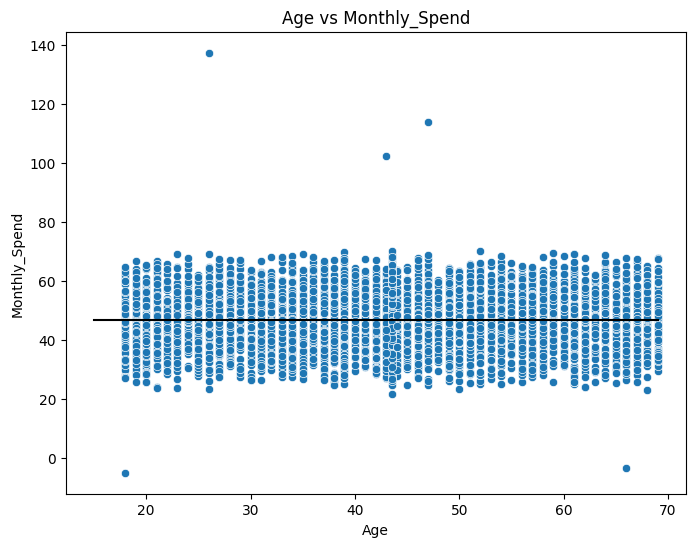

In [8]:
run_linear_regression("Age", "Monthly_Spend", stream_df, (15, 70, 1), "Age vs Monthly_Spend")

## Subscription Length

Coefficients: [5.23944542]
Intercept: 46.562889999999996
Mean Absolute Error: 6.642846985599881
Mean Squared Error: 64.82782933324118
Root Mean Squared Error: 8.051573096807926
R2 Score: 0.28288236685617896


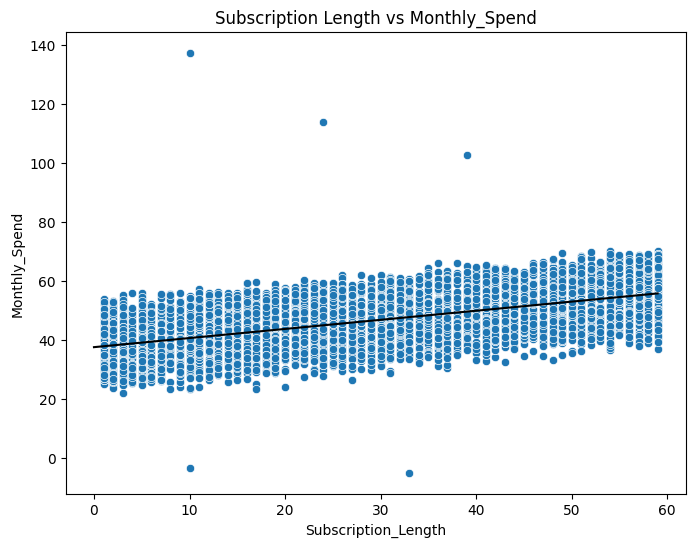

In [9]:
run_linear_regression("Subscription_Length", "Monthly_Spend", stream_df, (0, 60, 1), "Subscription Length vs Monthly_Spend")

## Support Tickets Raised

Coefficients: [-1.58474332]
Intercept: 46.562889999999996
Mean Absolute Error: 7.600180742380477
Mean Squared Error: 88.79502699716902
Root Mean Squared Error: 9.423111322549948
R2 Score: 0.01776011552340051


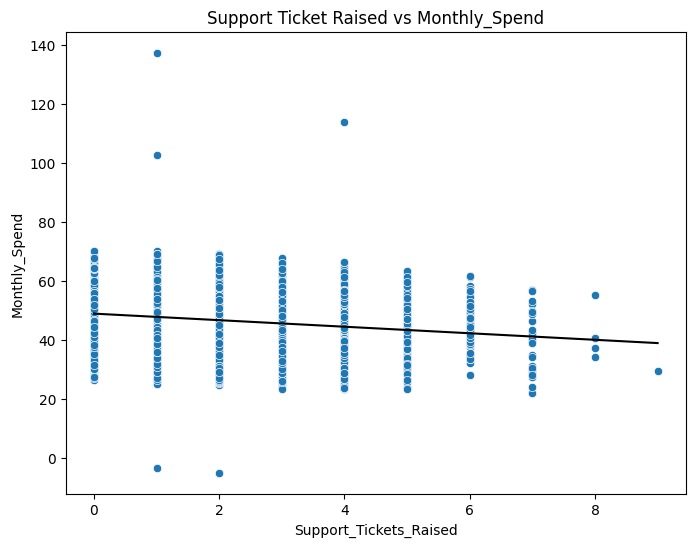

In [10]:
run_linear_regression("Support_Tickets_Raised", "Monthly_Spend", stream_df, (0, 10, 1), "Support Ticket Raised vs Monthly_Spend")

## Satisfaction Score

Coefficients: [6.85119392]
Intercept: 46.562889999999996
Mean Absolute Error: 5.1603353681596476
Mean Squared Error: 42.08439881263931
Root Mean Squared Error: 6.487248940239561
R2 Score: 0.5344674535735893


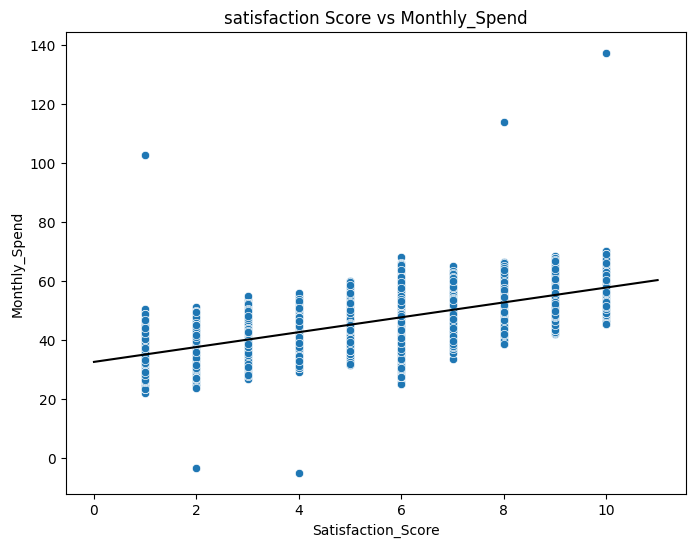

In [11]:
run_linear_regression("Satisfaction_Score", "Monthly_Spend", stream_df, (0, 12, 1), "satisfaction Score vs Monthly_Spend")

## Discount Offered

Coefficients: [2.06348056]
Intercept: 46.562889999999996
Mean Absolute Error: 7.421163720217703
Mean Squared Error: 86.36949207328912
Root Mean Squared Error: 9.293518820839022
R2 Score: 0.044591090455157634


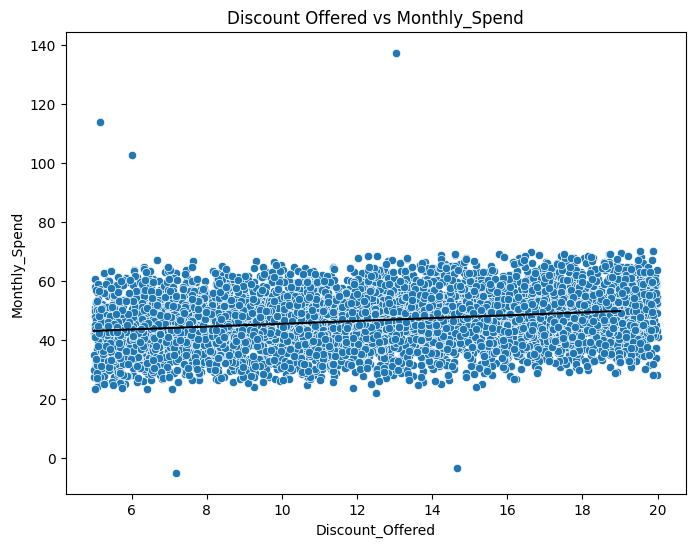

In [12]:
run_linear_regression("Discount_Offered", "Monthly_Spend", stream_df, (5, 20, 1), "Discount Offered vs Monthly_Spend")

## Last Activity

Coefficients: [-0.0154645]
Intercept: 46.562889999999996
Mean Absolute Error: 7.641969958058715
Mean Squared Error: 90.4909063749671
Root Mean Squared Error: 9.51267083289268
R2 Score: -0.0009994977169642816


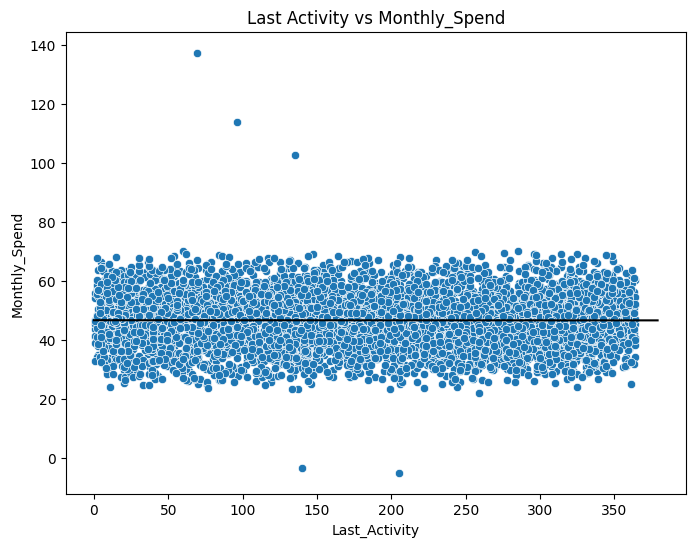

In [13]:
run_linear_regression("Last_Activity", "Monthly_Spend", stream_df, (0, 380, 1), "Last Activity vs Monthly_Spend")

### The best predictor of Monthly spend was Satisfaction score because it achieved an R2 score of0.5344 which is the closest to 1 out of all other numerical variables

## Polynomial Regression

#### I wrote a fuction to get the gradient, intercept and evaluation metrics and create a Polynomial regression model of the feature column against monthly spend (target column)  to be able to make comparisions with the linear regression model  

In [14]:
def run_polynomial_regression(feature_col, target_col, stream_df, feature_range, title, degree=2):
    x = stream_df[feature_col].to_numpy().reshape(-1, 1)
    y = stream_df[target_col]

    # Splitting data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Scaling the feature data
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Generating polynomial features
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train_scaled)
    x_test_poly = poly.transform(x_test_scaled)

    # Training the linear regression model on polynomial features
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Making predictions
    y_pred = model.predict(x_test_poly)

    # Evaluating the model
    mean_abs = mean_absolute_error(y_test, y_pred)
    mean_squared = mean_squared_error(y_test, y_pred)
    rms_error = np.sqrt(mean_squared)
    R2 = r2_score(y_test, y_pred)

    print(f"Polynomial Degree: {degree}")
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print("Mean Absolute Error:", mean_abs)
    print("Mean Squared Error:", mean_squared)
    print("Root Mean Squared Error:", rms_error)
    print("R2 Score:", R2)

    # Preparing range for plotting
    x_fit = np.arange(*feature_range).reshape(-1, 1)
    x_fit_scaled = scaler.transform(x_fit)
    x_fit_poly = poly.transform(x_fit_scaled)
    y_fit = model.predict(x_fit_poly)

    # Plotting the scatter plot and polynomial regression line
    plot = plt.figure(figsize=(8, 6))  # Create the plot and assign it to a variable
    sns.scatterplot(data=stream_df, x=feature_col, y=target_col)
    plt.plot(x_fit, y_fit, color='black')
    plt.title(title)
    plt.xlabel(feature_col)
    plt.ylabel(f"{target_col}")

## Age (Polynomial)

Polynomial Degree: 2
Coefficients: [ 0.         -0.00049752 -0.01955157]
Intercept: 46.58244156965079
Mean Absolute Error: 7.641361997265239
Mean Squared Error: 90.47203778344453
Root Mean Squared Error: 9.511679020206923
R2 Score: -0.0007907756321345882


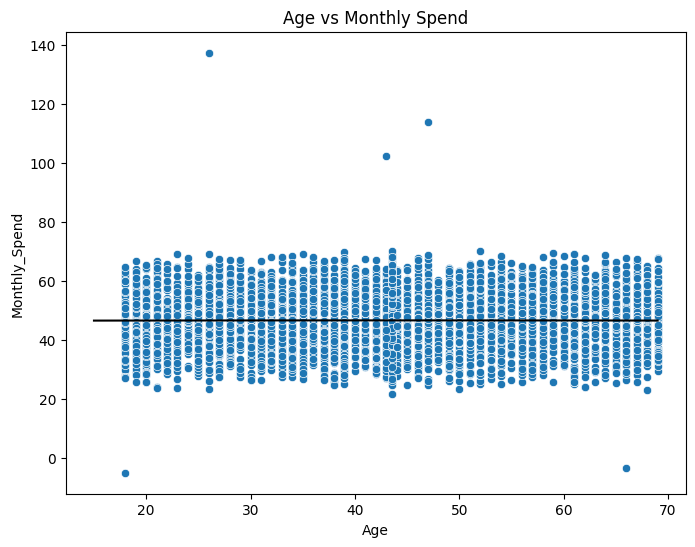

In [15]:
run_polynomial_regression("Age", "Monthly_Spend", stream_df, (15, 70), "Age vs Monthly Spend", degree=2)

## Subscription Length (Polnomial)

Polynomial Degree: 2
Coefficients: [0.         5.23236512 0.12269526]
Intercept: 46.44019474212136
Mean Absolute Error: 6.645539420307651
Mean Squared Error: 64.90630095376105
Root Mean Squared Error: 8.05644468445983
R2 Score: 0.28201432324967635


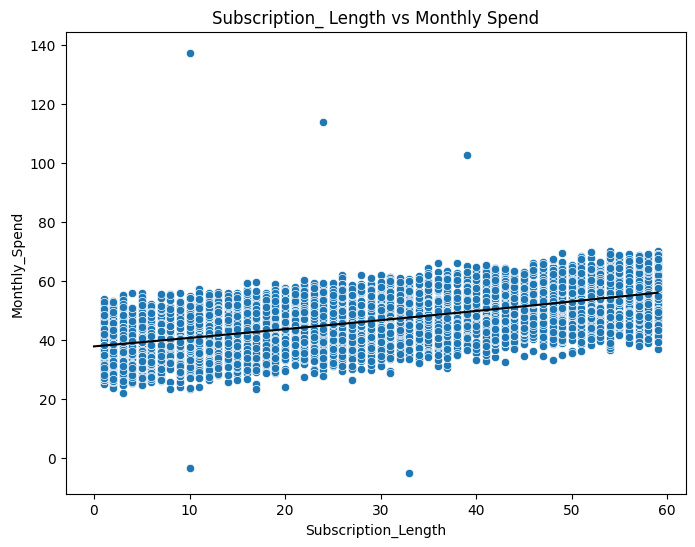

In [16]:
run_polynomial_regression("Subscription_Length", "Monthly_Spend", stream_df, (0, 60), "Subscription_ Length vs Monthly Spend", degree=2)

## Support Ticket Raised(POLYNOMIAL)

Polynomial Degree: 2
Coefficients: [ 0.         -1.72185586  0.18499112]
Intercept: 46.3778988753319
Mean Absolute Error: 7.605874139064932
Mean Squared Error: 88.91871017128355
Root Mean Squared Error: 9.429671795523085
R2 Score: 0.016391947161248477


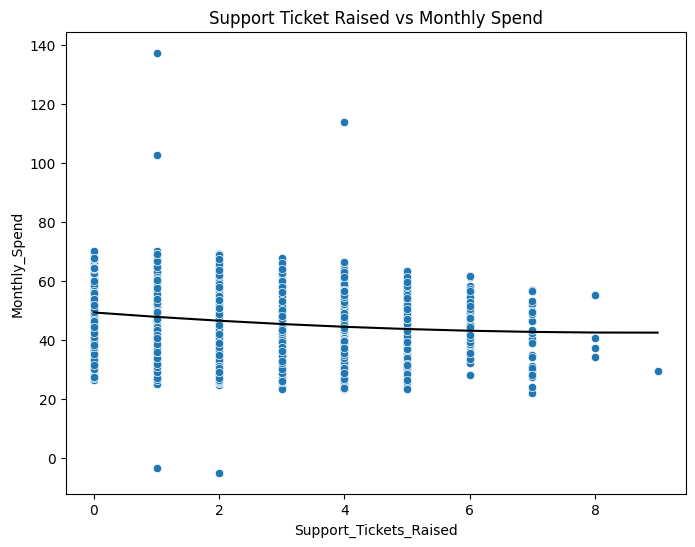

In [17]:
run_polynomial_regression("Support_Tickets_Raised", "Monthly_Spend", stream_df, (0, 10), "Support Ticket Raised vs Monthly Spend", degree=2)

## Satisfaction Score(Polynomial)

Polynomial Degree: 2
Coefficients: [0.         6.86475443 0.15762151]
Intercept: 46.40526849378566
Mean Absolute Error: 5.161274443263781
Mean Squared Error: 42.079808712704526
Root Mean Squared Error: 6.486895151974057
R2 Score: 0.5345182287057351


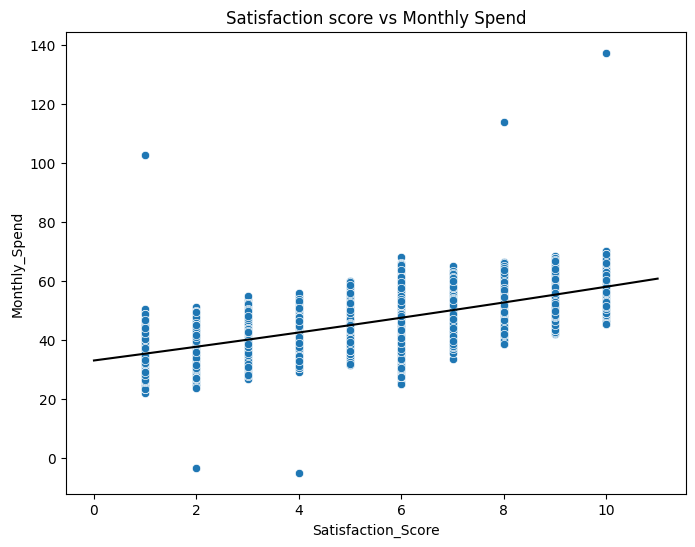

In [18]:
run_polynomial_regression("Satisfaction_Score", "Monthly_Spend", stream_df, (0, 12), "Satisfaction score vs Monthly Spend", degree=2)

## Discount Offered  (Polynomial)

Polynomial Degree: 2
Coefficients: [ 0.          2.06360117 -0.03782345]
Intercept: 46.600713445303036
Mean Absolute Error: 7.421170990665346
Mean Squared Error: 86.36946018286791
Root Mean Squared Error: 9.293517105104392
R2 Score: 0.04459144322315267


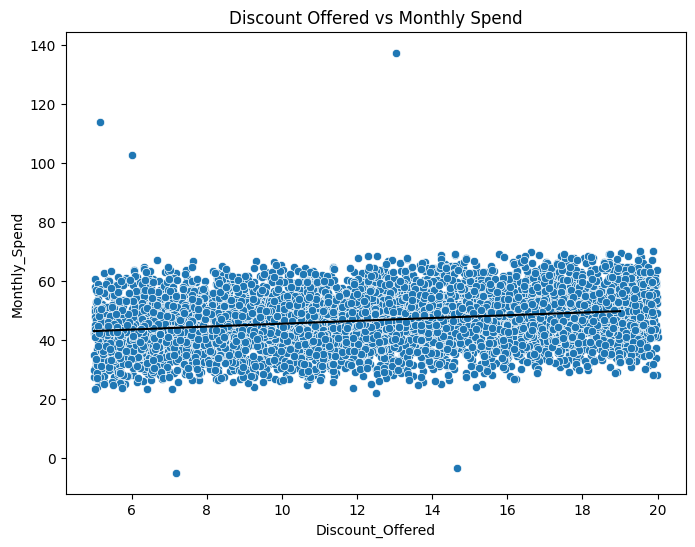

In [19]:
run_polynomial_regression("Discount_Offered", "Monthly_Spend", stream_df, (5, 20), "Discount Offered vs Monthly Spend", degree=2)

## Last Activity (Polynomial)

Polynomial Degree: 2
Coefficients: [ 0.         -0.01565999  0.02204516]
Intercept: 46.54084483968572
Mean Absolute Error: 7.641044491414201
Mean Squared Error: 90.48409695250672
Root Mean Squared Error: 9.512312912878063
R2 Score: -0.0009241727065778527


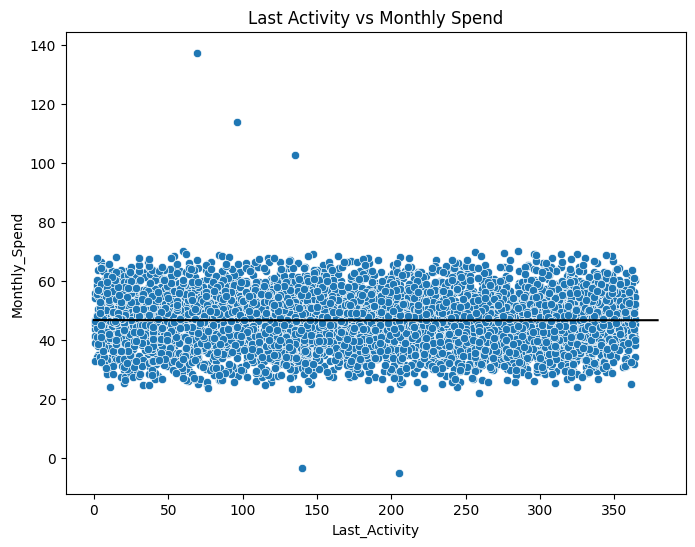

In [20]:
run_polynomial_regression("Last_Activity", "Monthly_Spend", stream_df, (0, 380), "Last Activity vs Monthly Spend", degree=2)

## Multiple Linear Regression Model

In [21]:
# Defining feature names with multiple numerical features
feature_names = ["Age", "Subscription_Length", "Support_Tickets_Raised", "Satisfaction_Score", "Discount_Offered", "Last_Activity"] 

x = stream_df[feature_names]
y = stream_df["Monthly_Spend"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scale = StandardScaler()

scale.fit(x_train)

x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

stream_linear = LinearRegression()
    
stream_linear.fit(x_train_scaled, y_train)

intercept = stream_linear.intercept_
coefficients = stream_linear.coef_

print("coefficients: ", coefficients)
print("intercept: ", intercept)

# Evaluating the model
stream_pred = stream_linear.predict(x_test_scaled)
mean_abs = mean_absolute_error(y_test, stream_pred)
mean_squared = mean_squared_error(y_test, stream_pred)
rms_error = np.sqrt(mean_squared)
R2 = r2_score(y_test, stream_pred)

print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

coefficients:  [ 5.24329143e-03  5.14563324e+00 -1.76465374e+00  6.80488181e+00
  2.11590834e+00 -6.89629583e-02]
intercept:  46.562889999999996
Mean absolute error:  1.3584748263796584
Mean squared error:  10.294478003298366
Root mean squared error:  3.208500896571227
R2:  0.8861237253182088


In [22]:
feature_names = ["Age", "Subscription_Length", "Support_Tickets_Raised", "Satisfaction_Score", "Discount_Offered", "Last_Activity"]

x = stream_df[feature_names]
y = stream_df["Monthly_Spend"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scale = StandardScaler()

scale.fit(x_train)
    
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)


stream_linear = RandomForestRegressor()
    
stream_linear.fit(x_train_scaled, y_train)
stream_pred = stream_linear.predict(x_test_scaled)
    
mean_abs = mean_absolute_error(y_test, stream_pred)
rms_error = np.sqrt(mean_squared)
R2 = r2_score(y_test, stream_pred)

print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  1.7900242000000024
Mean squared error:  10.294478003298366
Root mean squared error:  3.208500896571227
R2:  0.8656183552534046


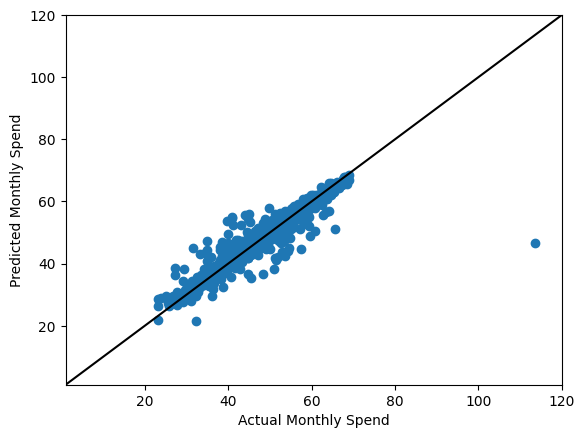

In [23]:
plt.scatter(y_test, stream_pred)

plt.plot([0, 120], [0, 120], 'k-')
plt.xlabel("Actual Monthly Spend")
plt.ylabel("Predicted Monthly Spend")

plt.xlim(1, 120)
plt.ylim(1, 120)

plt.show()

In [24]:
# Defining Numerical features and Categorical features
numerical_features = ["Age", "Subscription_Length", "Support_Tickets_Raised", "Satisfaction_Score", "Discount_Offered", "Last_Activity"]
categorical_features = ["Gender", "Region", "Payment_Method"]

# Preparing input and target(Monthly Spend)
X = stream_df[numerical_features + categorical_features]
y = stream_df["Monthly_Spend"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing StandardScaler to numerical features and OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Creating a pipeline that first transforms the data, then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])


pipeline.fit(X_train, y_train)


model = pipeline.named_steps['model']
intercept = model.intercept_
coefficients = model.coef_

print("Coefficients: ", coefficients)
print("Intercept: ", intercept)


y_pred = pipeline.predict(X_test)
mean_abs = mean_absolute_error(y_test, y_pred)
mean_squared = mean_squared_error(y_test, y_pred)
rms_error = np.sqrt(mean_squared)
R2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mean_abs)
print("Mean Squared Error:", mean_squared)
print("Root Mean Squared Error:", rms_error)
print("R2 Score:", R2)

Coefficients:  [ 2.55090941e-03  5.15065334e+00 -1.76328275e+00  6.80484582e+00
  2.11587968e+00 -6.81053569e-02  4.70421521e-02 -3.20932074e-01
 -1.99538756e-01 -3.50080935e-01  8.97215168e-02 -2.05569514e-02]
Intercept:  46.73858491258265
Mean Absolute Error: 1.3732169297431447
Mean Squared Error: 10.321287637829242
Root Mean Squared Error: 3.212676086665016
R2 Score: 0.8858271603729072


## Random Forest Regressoion

In [25]:
numerical_features = ["Age", "Subscription_Length", "Support_Tickets_Raised", "Satisfaction_Score", "Discount_Offered", "Last_Activity"]
categorical_features = ["Gender", "Region", "Payment_Method"]

X = stream_df[numerical_features + categorical_features]
y = stream_df["Monthly_Spend"]

# Preprocessing scaling numerical features  and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying preprocessing steps on both train and test sets
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Create and train the Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

# Calculate the evaluation metrics
mean_abs = mean_absolute_error(y_test, y_pred)
mean_squared = mean_squared_error(y_test, y_pred)
rms_error = np.sqrt(mean_squared)
R2 = r2_score(y_test, y_pred)

print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  1.8113298000000004
Mean squared error:  11.922536098860004
Root mean squared error:  3.4529025614488464
R2:  0.8681143429261449


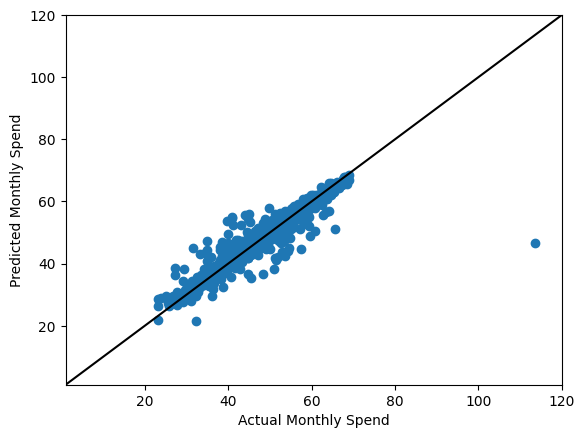

In [26]:
plt.scatter(y_test, stream_pred)

plt.plot([0, 120], [0, 120], 'k-')
plt.xlabel("Actual Monthly Spend")
plt.ylabel("Predicted Monthly Spend")

plt.xlim(1, 120)
plt.ylim(1, 120)

plt.show()

## ANN

#### I wrote a function called build and train ann to build and train the Artificial Neural Network model to predic Monthly spend based on the all the features given features given  Numerical and Categorical 

In [27]:
def build_and_train_ann(
    df,
    target="Monthly_Spend",
    layer_units=[64, 64],
    dropout_rate=0.2,
    learning_rate=0.001,
    epochs=200,
    verbose="auto"
):

    # Features
    stream_features = [
        "Age", "Subscription_Length", "Support_Tickets_Raised",
        "Satisfaction_Score", "Discount_Offered", "Last_Activity",
        "Gender", "Region", "Payment_Method"
    ]

    numerical_features = [
        "Age", "Subscription_Length", "Support_Tickets_Raised",
        "Satisfaction_Score", "Discount_Offered", "Last_Activity"
    ]

    categorical_features = [
        "Gender", "Region", "Payment_Method"
    ]


    x = df[stream_features]
    y = df[target]


    preprocessor = ColumnTransformer(
        transformers=[
            ('num', MinMaxScaler(), numerical_features),
            ('cat', OneHotEncoder(drop='first'), categorical_features)
        ]
    )

  
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


    x_train_scaled = preprocessor.fit_transform(x_train)
    x_test_scaled = preprocessor.transform(x_test)

    num_of_features = x_train_scaled.shape[1]  # Number of features after scaling

    # Building the ANN Model
    model = Sequential()

    # Adding input layer
    model.add(Input(shape=(num_of_features,)))

    # Adding first hidden layer with ReLU activation
    model.add(Dense(units=layer_units[1], activation="relu"))
    
    # Adding Dropout layer
    model.add(Dropout(dropout_rate))

    # Adding second hidden layer
    model.add(Dense(units=layer_units[1], activation="relu"))

    # Adding output layer
    model.add(Dense(units=1, activation="linear"))

    # Printing model summary
    print("\nModel Summary:")
    model.summary()

    # Compiling the model with Adam optimizer
    model.compile(optimizer=Adam(learning_rate=learning_rate), 
                  loss="mean_squared_error", 
                  metrics=["mean_squared_error", "mean_absolute_error"])

    # EarlyStopping to monitor validation loss
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

    # Training the model
    history = model.fit(
        x=x_train_scaled,
        y=y_train,
        verbose=verbose,
        epochs=epochs,
        validation_data=(x_test_scaled, y_test), 
        callbacks=[early_stopping]
    )

    
    y_pred = model.predict(x_test_scaled)

    y_pred = y_pred.flatten()

  
    plt.figure(figsize=(4, 3), dpi=300)
    plt.scatter(y_test, y_pred)
    plt.plot([0, 120], [0, 120], 'k-')  
    plt.xlabel("Actual Monthly Spend (£)")
    plt.ylabel("Predicted Monthly Spend (£)")
    plt.xlim(0, 120)
    plt.ylim(0, 120)
    plt.title("Actual vs. Predicted Spend")
    plt.show()

    # Loss Plot
    history_df = pd.DataFrame(history.history)
    plt.figure(figsize=(8, 6), dpi=300)
    plt.plot(history_df["loss"], label="Training Loss")
    plt.plot(history_df["val_loss"], label="Validation Loss")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Loss (MSE)")
    plt.title("Training vs Validation Loss")
    plt.show()

   
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")

    return model


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1746.2611 - mean_absolute_error: 39.5924 - mean_squared_error: 1746.2611 - val_loss: 89.7913 - val_mean_absolute_error: 7.3820 - val_mean_squared_error: 89.7913
Epoch 2/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 86.7022 - mean_absolute_error: 7.3091 - mean_squared_error: 86.7022 - val_loss: 51.4098 - val_mean_absolute_error: 5.4445 - val_mean_squared_error: 51.4098
Epoch 3/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56.2656 - mean_absolute_error: 5.7350 - mean_squared_error: 56.2656 - val_loss: 28.0631 - val_mean_absolute_error: 3.8001 - val_mean_squared_error: 28.0631
Epoch 4/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39.9659 - mean_absolute_error: 4.6062 - mean_squared_error: 39.9659 - val_loss: 17.8614 - val_mean_absolute_error: 2.7523 - val_mean_squared_error: 17.8614
Epoch 5/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.0192 - mean_absolute_error: 3.7830 - mean_squared_error: 26.019

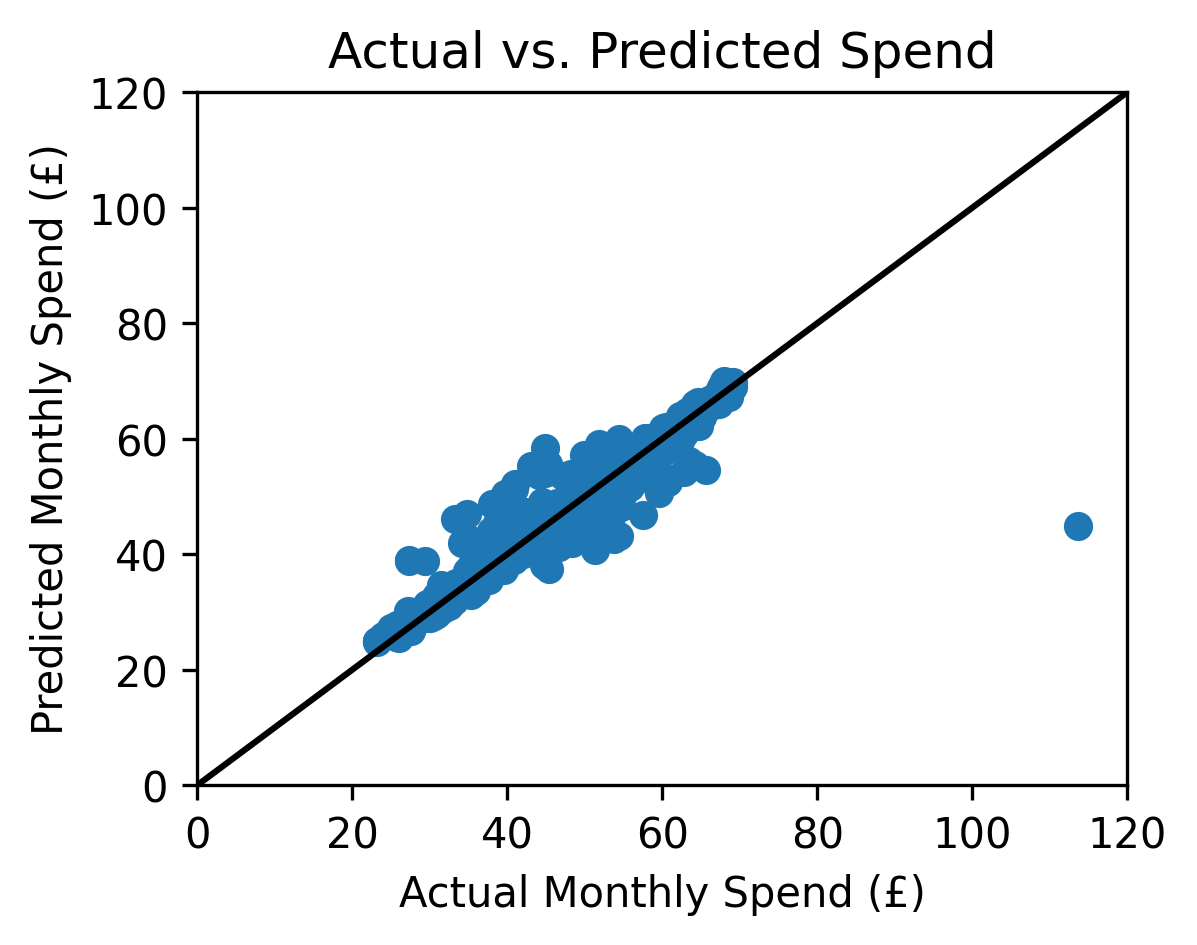

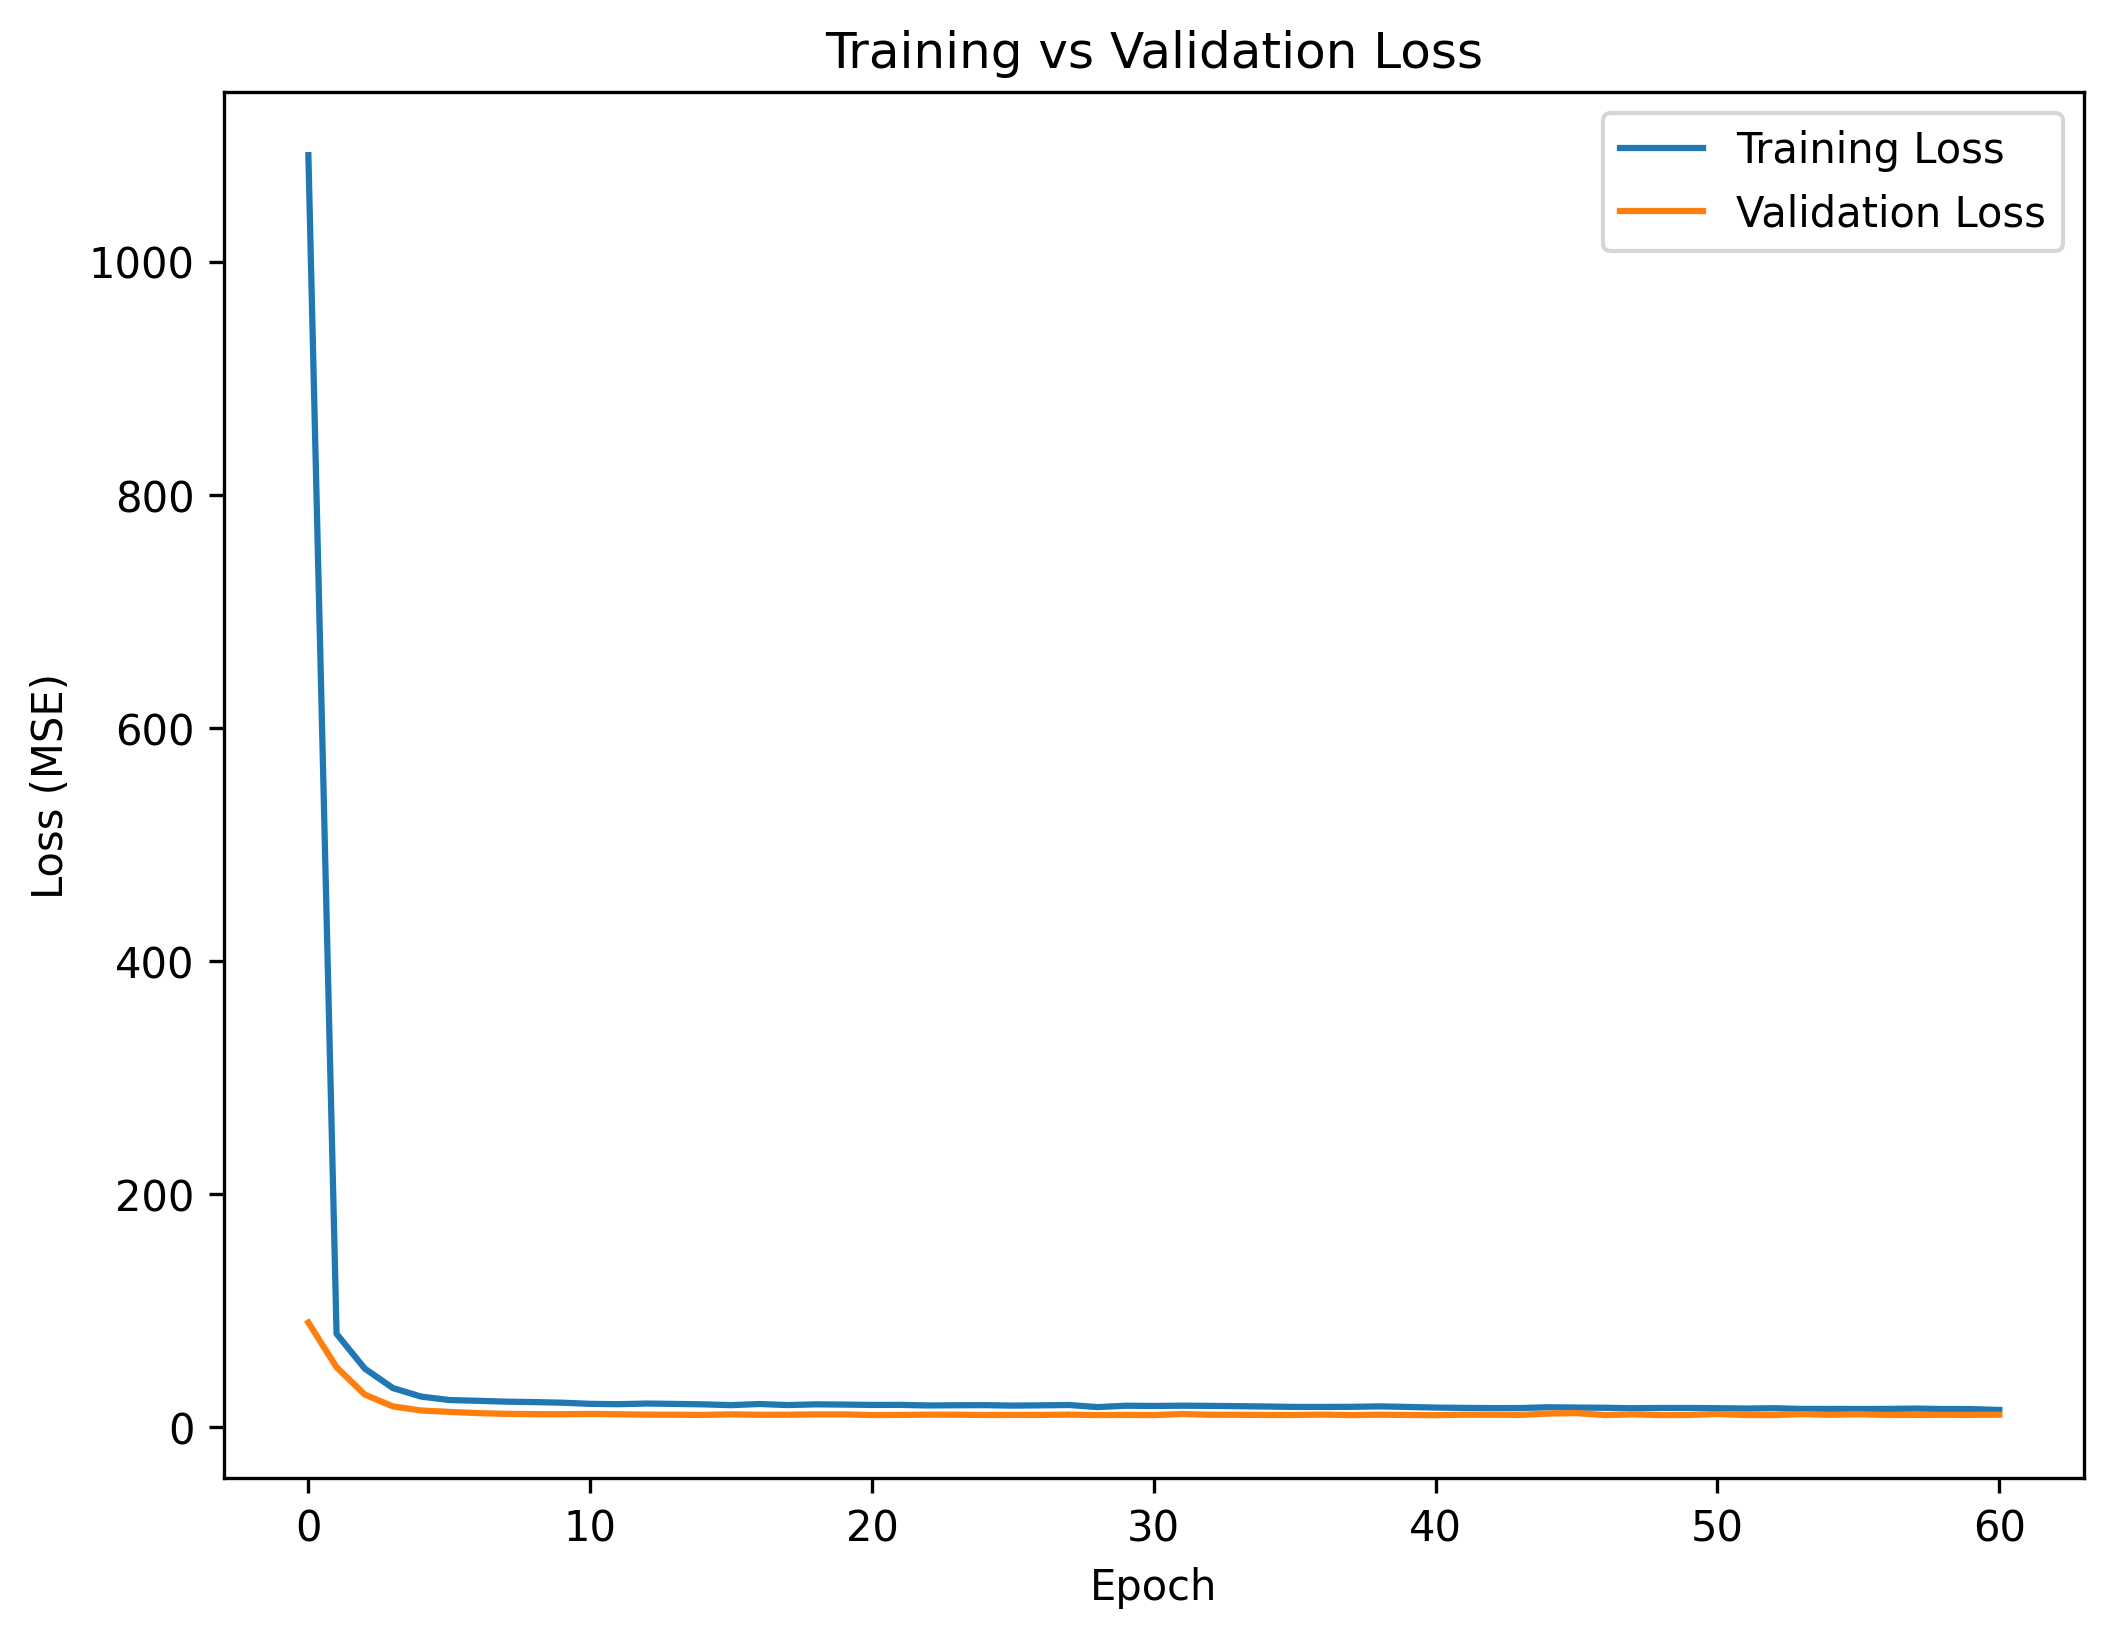

MAE: 1.3813
MSE: 10.3475
RMSE: 3.2167
R²: 0.8855


In [28]:
#Creating a model with default values 
model = build_and_train_ann(
    df=stream_df,          
    target="Monthly_Spend", 
    layer_units=[64, 64],  
    dropout_rate=0.2,     
    learning_rate=0.001,       
    epochs=200,           
    verbose="auto"          
)

## Hyperparameter tuning


Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 628.8190 - mean_absolute_error: 18.1858 - mean_squared_error: 628.8190 - val_loss: 14.6226 - val_mean_absolute_error: 2.3651 - val_mean_squared_error: 14.6226
Epoch 2/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.1097 - mean_absolute_error: 3.6832 - mean_squared_error: 26.1097 - val_loss: 14.5697 - val_mean_absolute_error: 2.3842 - val_mean_squared_error: 14.5697
Epoch 3/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.1854 - mean_absolute_error: 3.4218 - mean_squared_error: 23.1854 - val_loss: 11.0211 - val_mean_absolute_error: 1.6020 - val_mean_squared_error: 11.0211
Epoch 4/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.5618 - mean_absolute_error: 3.1260 - mean_squared_error: 18.5618 - val_loss: 11.6139 - val_mean_absolute_error: 1.7551 - val_mean_squared_error: 11.6139
Epoch 5/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.0968 - mean_absolute_error: 3.2750 - mean_squared_error: 24.0968 

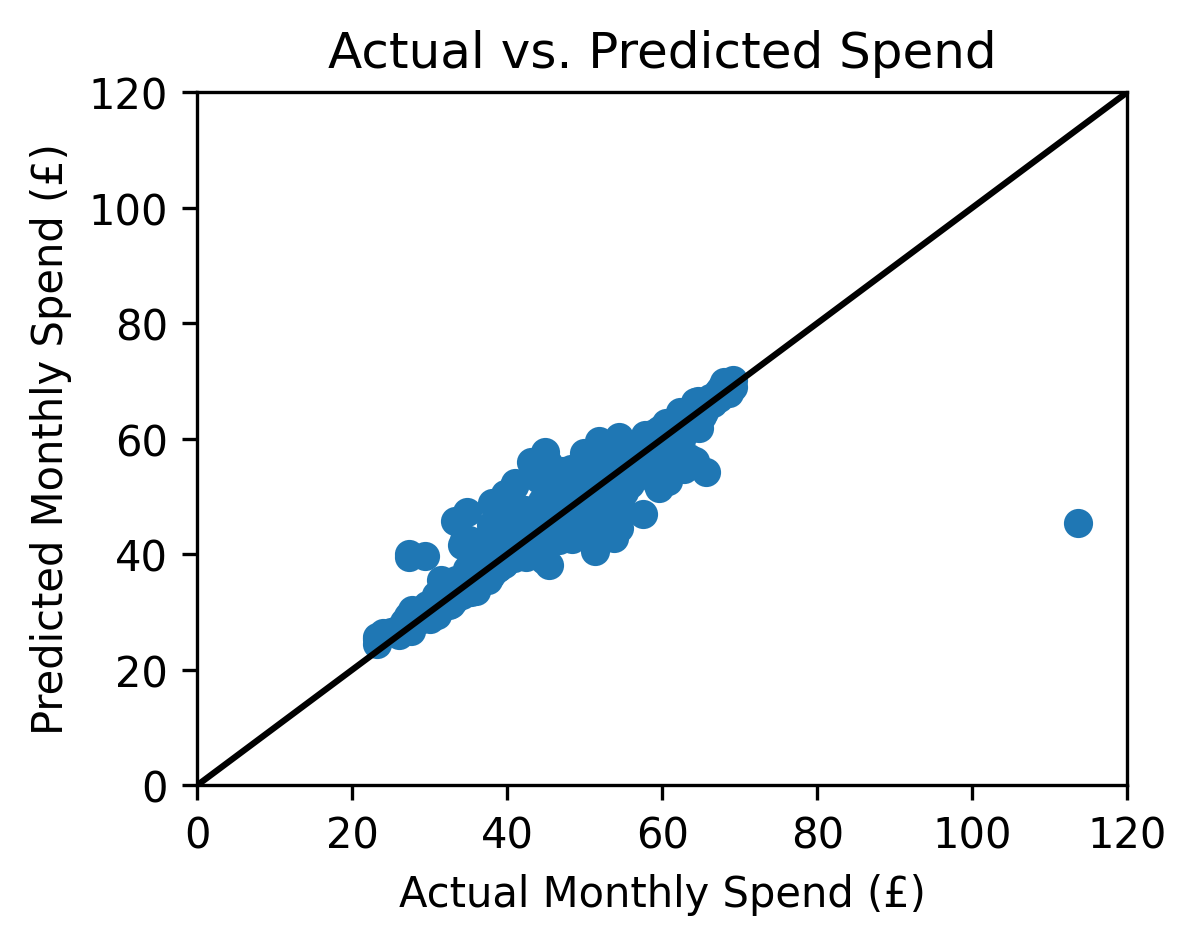

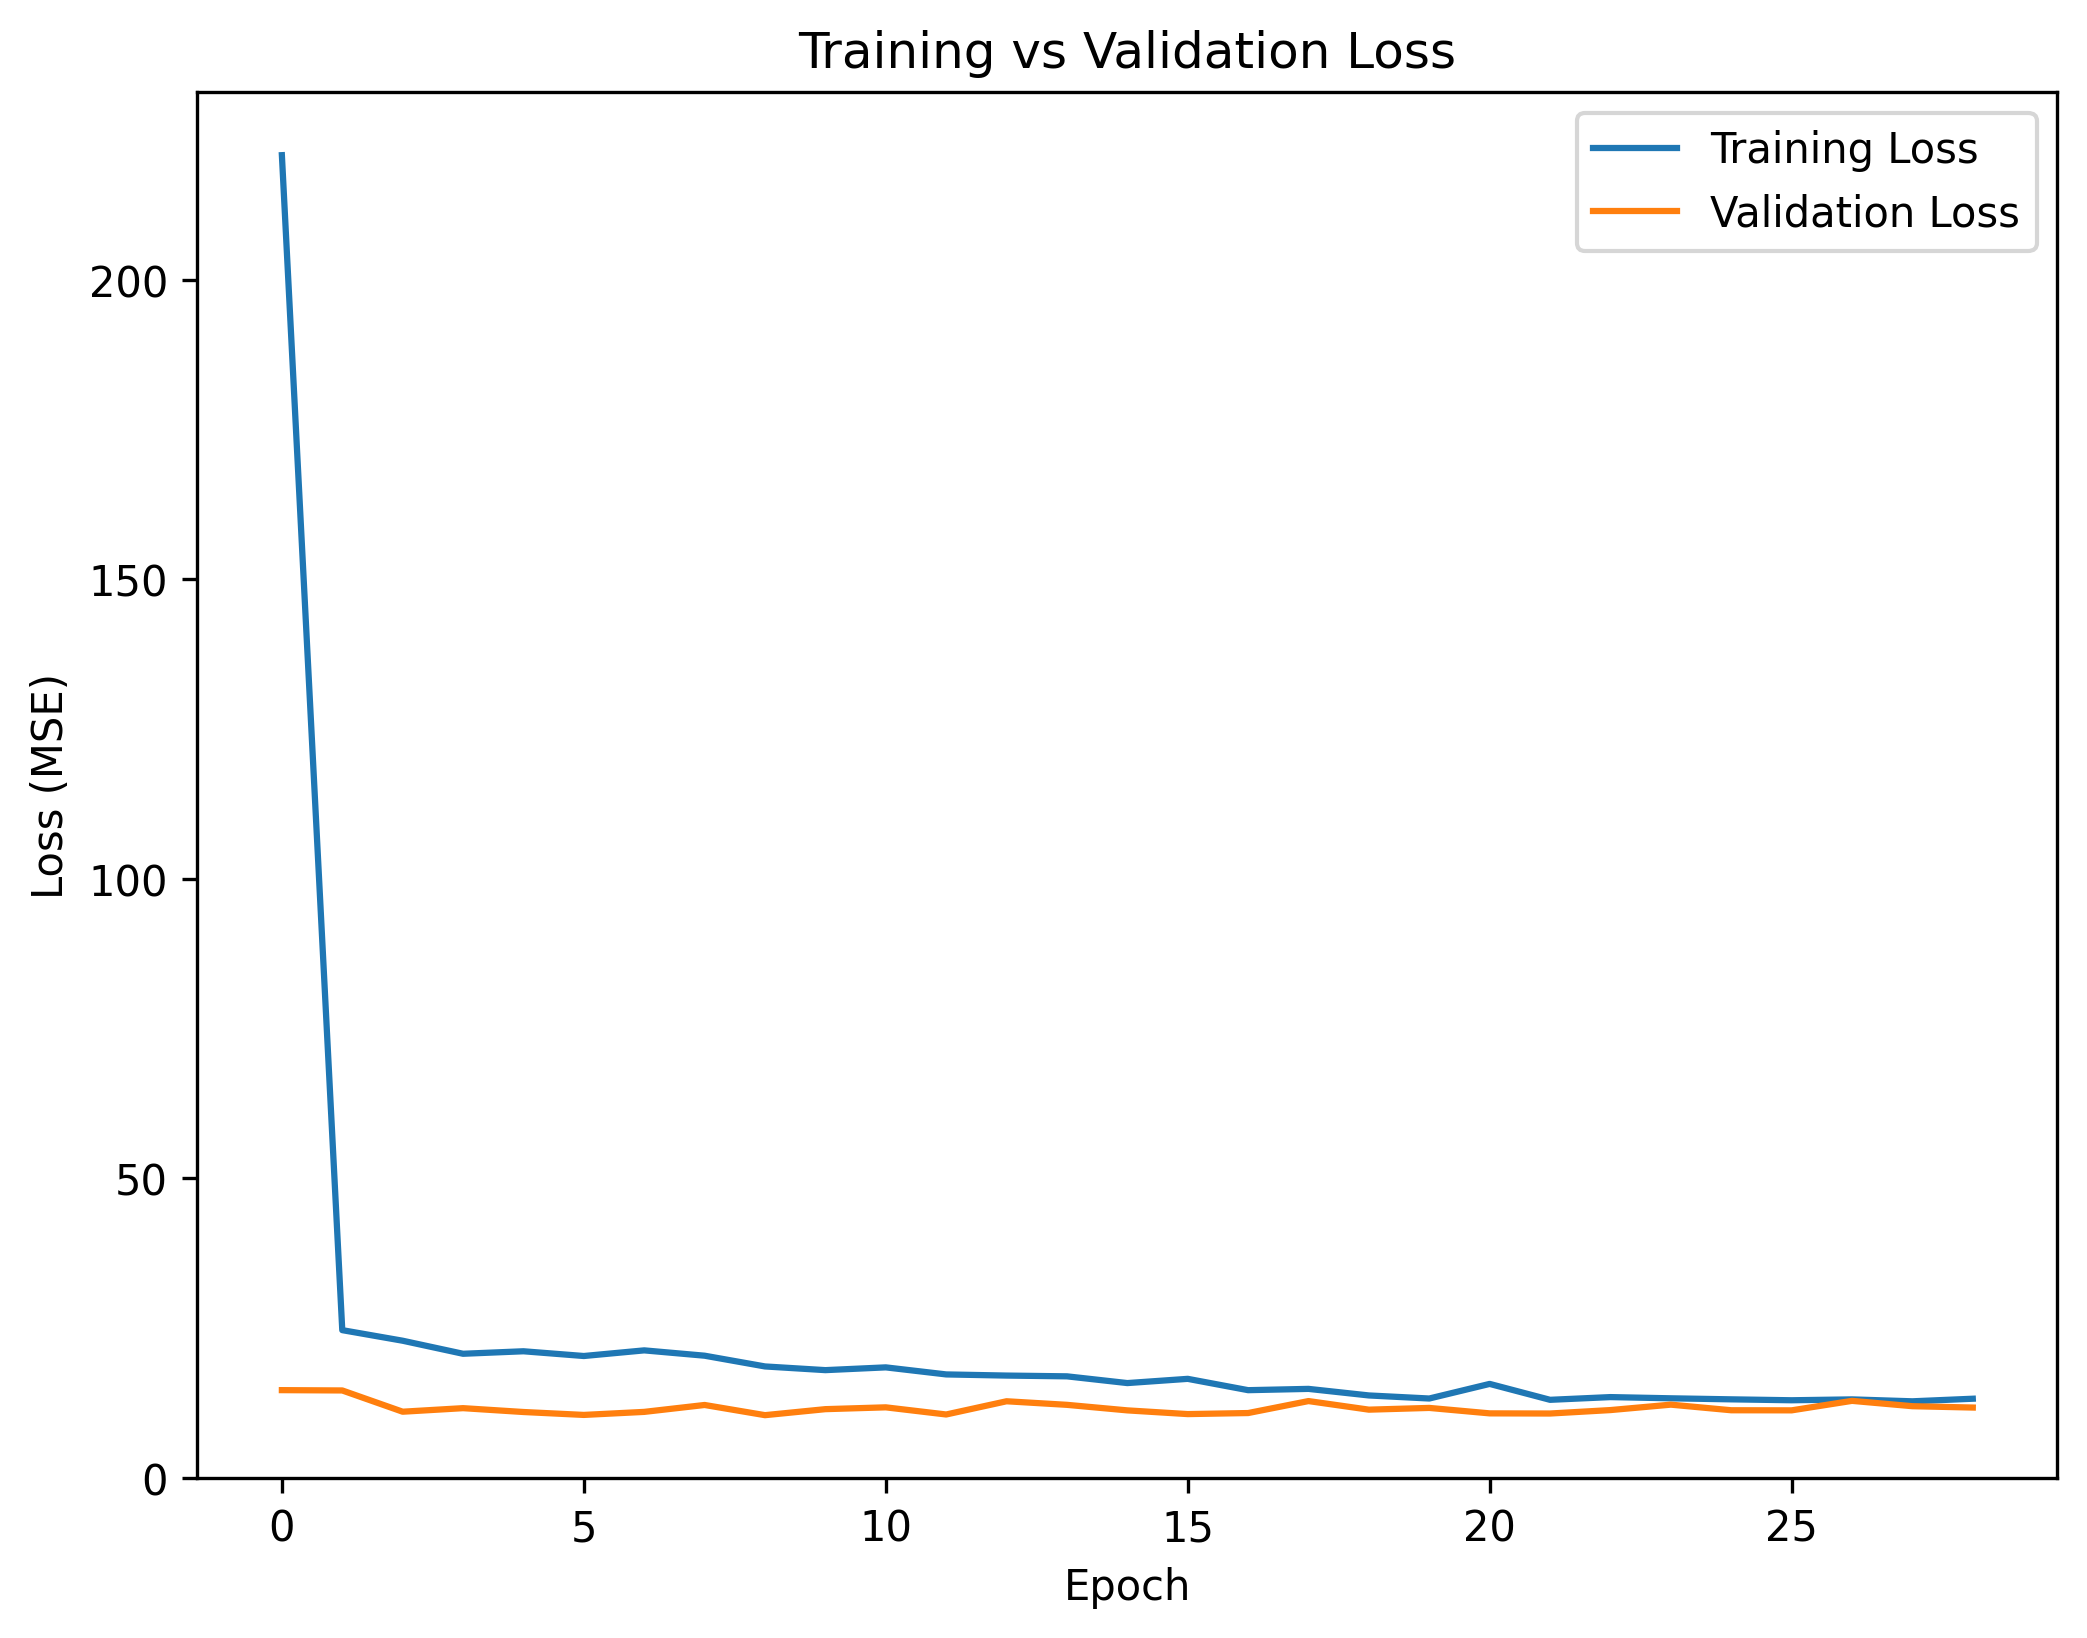

MAE: 1.4557
MSE: 10.4433
RMSE: 3.2316
R²: 0.8845


In [29]:
# Creating a new model using the existing function but with a learning rate of 0.01
model_2 = build_and_train_ann(
    df=stream_df,           
    target="Monthly_Spend", 
    layer_units=[64, 64],    
    dropout_rate=0.2,       
    learning_rate=0.01,     
    epochs=200,             
    verbose="auto"          
)


Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2232.7061 - mean_absolute_error: 46.3120 - mean_squared_error: 2232.7061 - val_loss: 2214.7874 - val_mean_absolute_error: 46.1033 - val_mean_squared_error: 2214.7874
Epoch 2/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2177.2014 - mean_absolute_error: 45.7061 - mean_squared_error: 2177.2014 - val_loss: 2069.4517 - val_mean_absolute_error: 44.5278 - val_mean_squared_error: 2069.4517
Epoch 3/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 1973.6154 - mean_absolute_error: 43.4165 - mean_squared_error: 1973.6154 - val_loss: 1776.7067 - val_mean_absolute_error: 41.1697 - val_mean_squared_error: 1776.7067
Epoch 4/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1647.8730 - mean_absolute_error: 39.5643 - mean_squared_error: 1647.8730 - val_loss: 1318.5767 - val_mean_absolute_error: 35.2654 - val_mean_squared_error: 1318.5767
Epoch 5/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1164.0948 - mean_absolute_err

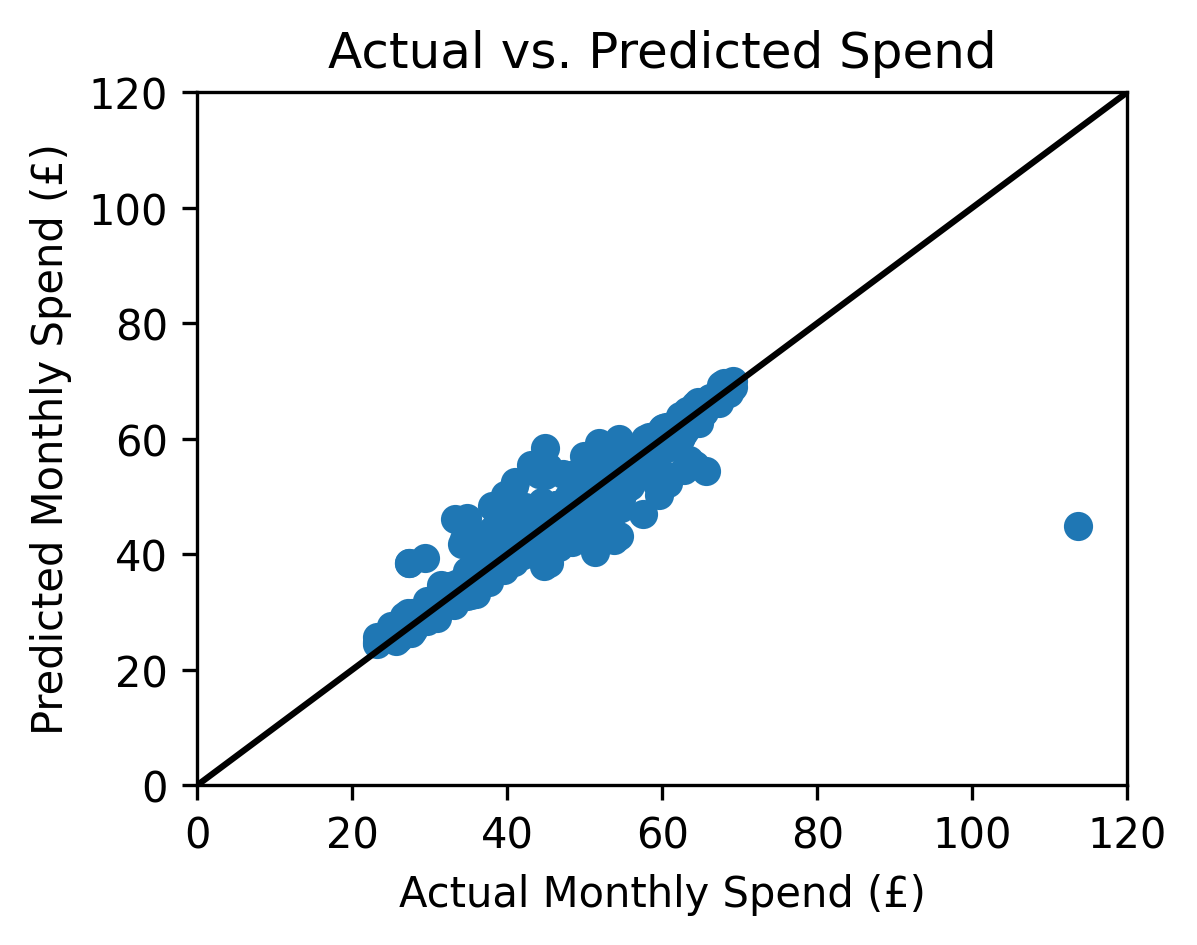

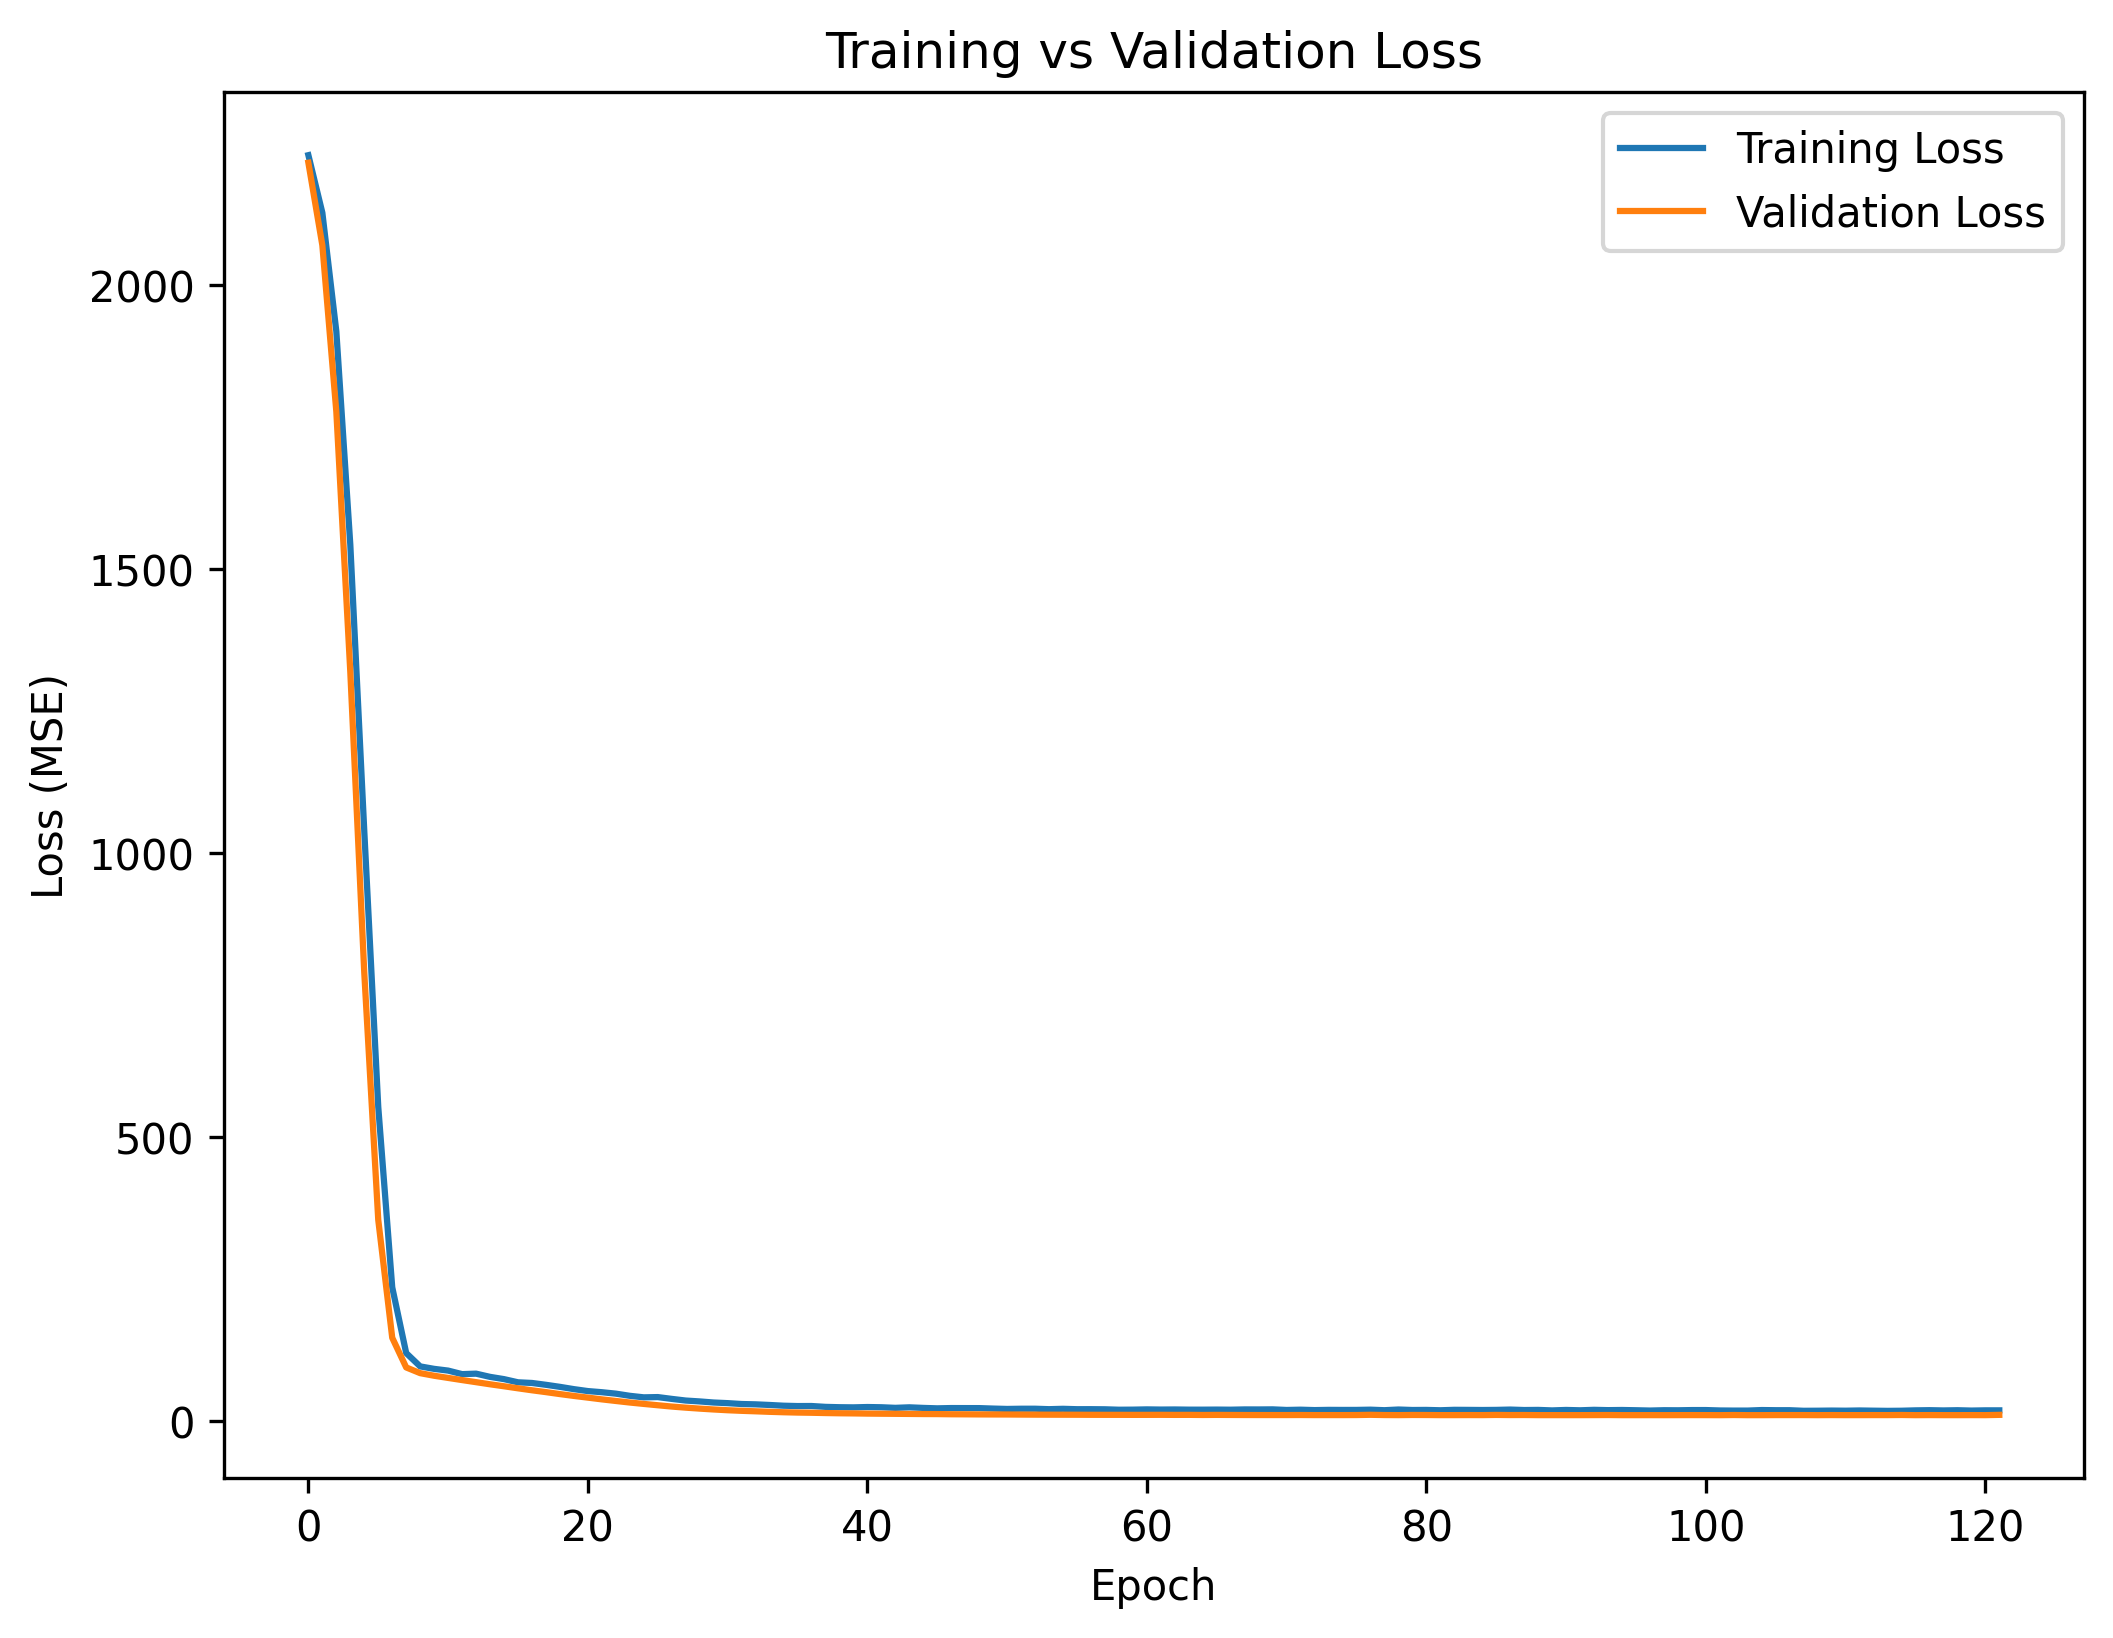

MAE: 1.3872
MSE: 10.3448
RMSE: 3.2163
R²: 0.8856


In [30]:
# Creating a new model using the existing function but with a learning rate of 0.0001
model_3 = build_and_train_ann(
    df=stream_df,         
    target="Monthly_Spend",  
    layer_units=[64, 64],   
    dropout_rate=0.2,       
    learning_rate=0.0001,    
    epochs=200,            
    verbose="auto"          
)


Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1920.4503 - mean_absolute_error: 41.9682 - mean_squared_error: 1920.4503 - val_loss: 100.2765 - val_mean_absolute_error: 7.8521 - val_mean_squared_error: 100.2765
Epoch 2/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 96.4624 - mean_absolute_error: 7.6096 - mean_squared_error: 96.4624 - val_loss: 64.1156 - val_mean_absolute_error: 6.1447 - val_mean_squared_error: 64.1156
Epoch 3/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.8199 - mean_absolute_error: 6.1607 - mean_squared_error: 60.8199 - val_loss: 39.5695 - val_mean_absolute_error: 4.6918 - val_mean_squared_error: 39.5695
Epoch 4/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 38.8926 - mean_absolute_error: 4.8213 - mean_squared_error: 38.8926 - val_loss: 22.2923 - val_mean_absolute_error: 3.2616 - val_mean_squared_error: 22.2923
Epoch 5/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.9971 - mean_absolute_error: 3.6561 - mean_squared_error: 25.9

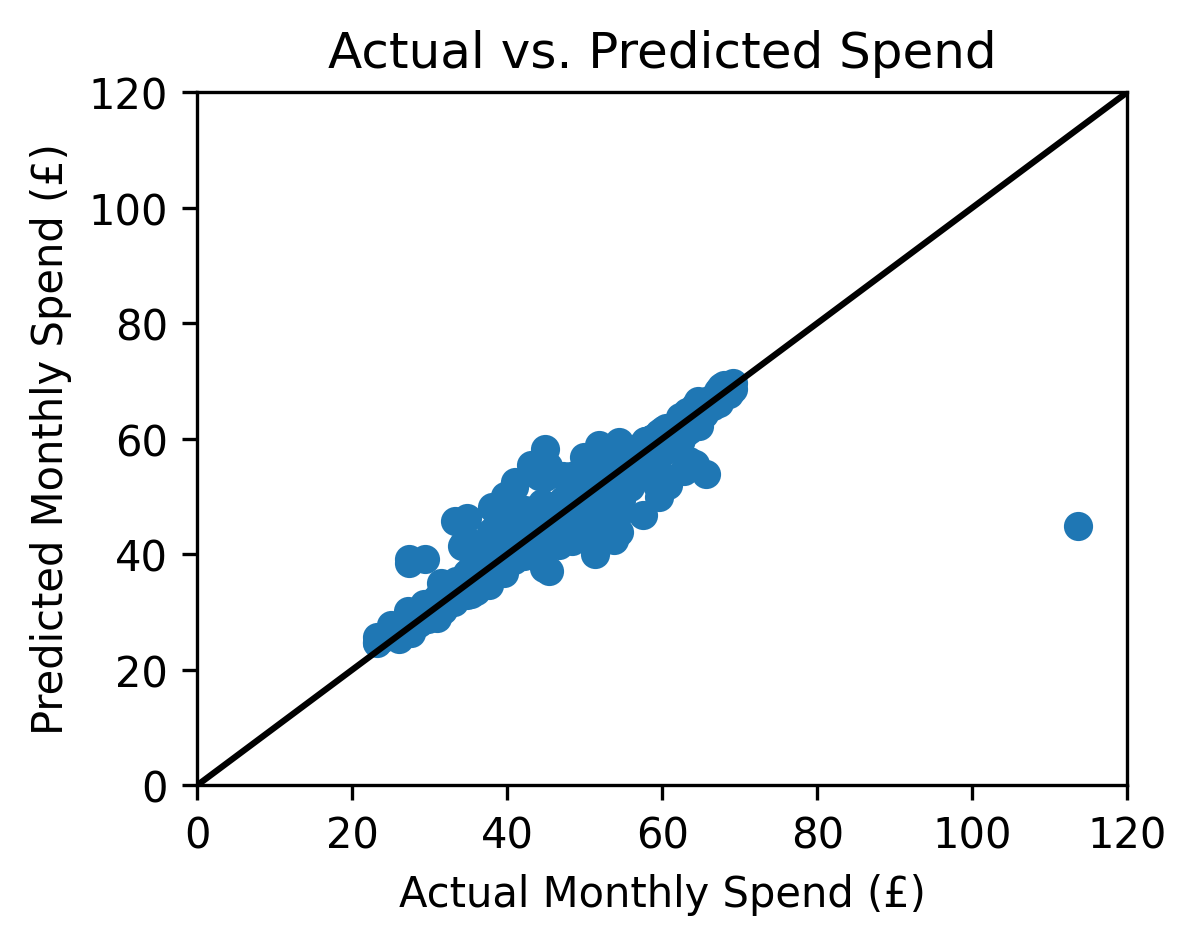

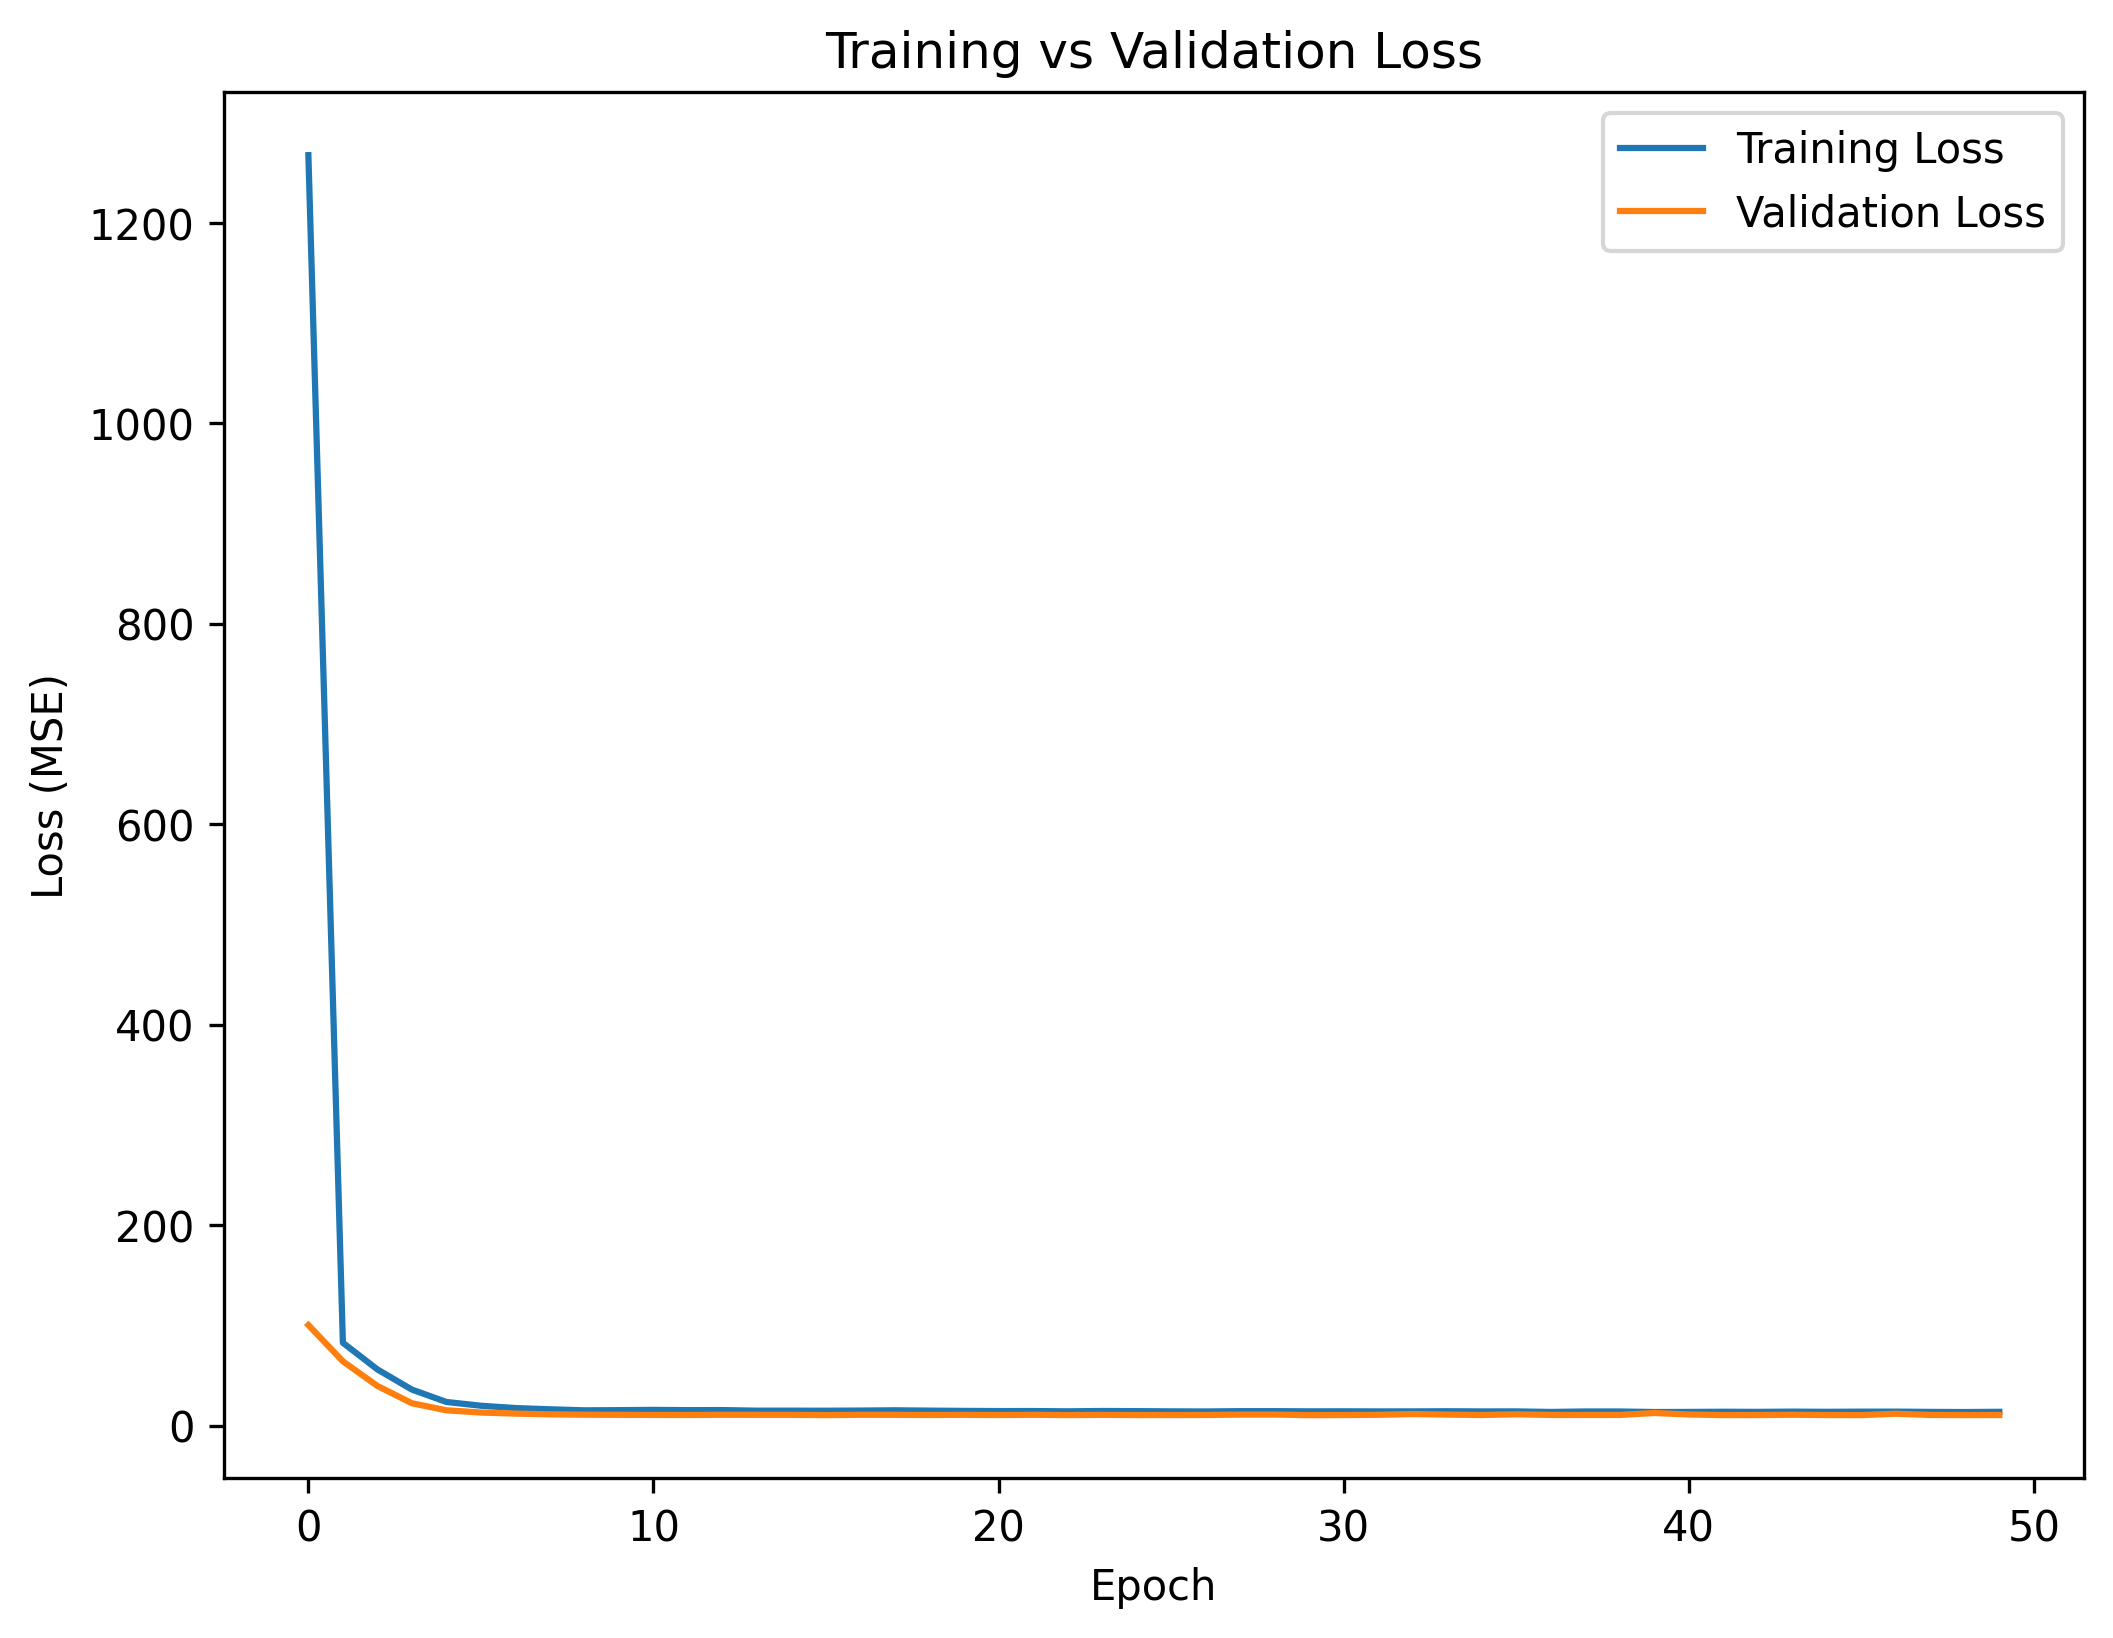

MAE: 1.4164
MSE: 10.3935
RMSE: 3.2239
R²: 0.8850


In [31]:
# Creating a new model using the existing function but with a dropout rateof 0.1
model_4 = build_and_train_ann(
    df=stream_df,          
    target="Monthly_Spend",  
    layer_units=[64, 64],    
    dropout_rate=0.1,      
    learning_rate=0.001,     
    epochs=200,             
    verbose="auto"         
)

## Classification Models

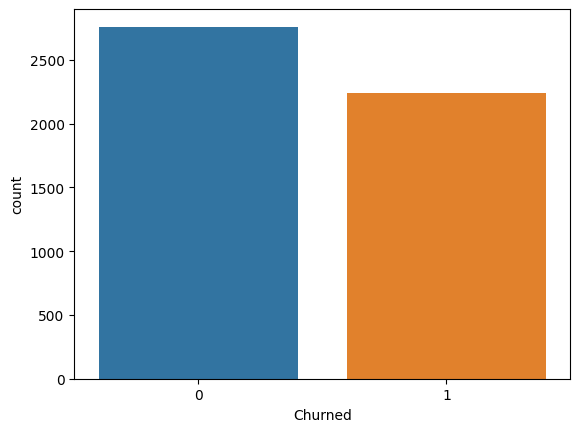

In [32]:
sns.countplot(data = stream_df, x = "Churned")
plt.show()

In [33]:
 numerical_features = [
        "Age", "Subscription_Length", "Support_Tickets_Raised",
        "Satisfaction_Score", "Discount_Offered", "Last_Activity"
    ]
x = stream_df[numerical_features]
y = stream_df["Churned"]

<Axes: xlabel='Churned', ylabel='count'>

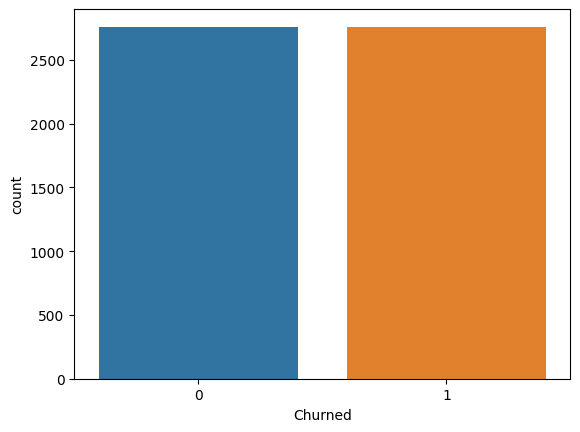

In [34]:
# CreatING an instance of the SMOTE class an setting the relevant parameters.
sm = SMOTE(random_state=42, k_neighbors = 2)

x_res, y_res = sm.fit_resample(x, y)

new_df = pd.DataFrame({"Churned" : y_res.to_numpy()})
# Using Seaborn to plot the distribution of class labels.
sns.countplot(data = new_df, x = "Churned")

## KNN

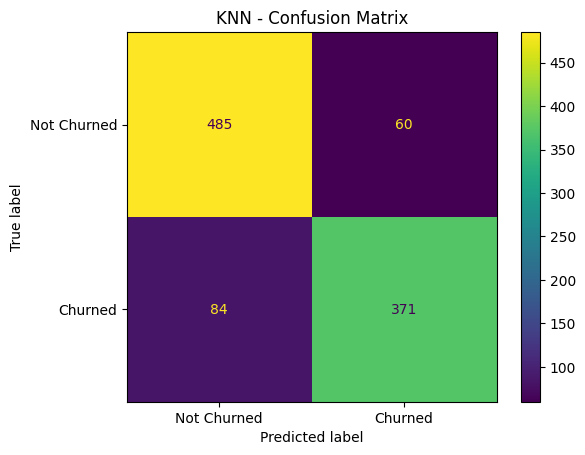

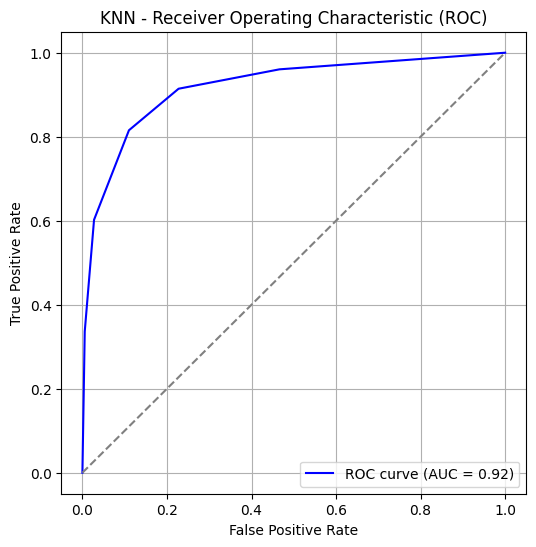


KNN Evaluation Metrics:
Accuracy : 0.8560
Precision: 0.8608
Recall   : 0.8154
F1 Score : 0.8375
AUC-ROC  : 0.9183


In [35]:
# Define features
numerical_features = [
    "Age", "Subscription_Length", "Support_Tickets_Raised",
    "Satisfaction_Score", "Discount_Offered", "Last_Activity"
]
categorical_features = [
    "Gender", "Region", "Payment_Method"
]

# Prepare data
x = stream_df[numerical_features + categorical_features]
y = stream_df["Churned"]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # Encode categorical features
    ]
)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Apply preprocessing
x_train_scaled = preprocessor.fit_transform(x_train)
x_test_scaled = preprocessor.transform(x_test)

# Training KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default n_neighbors=5
knn_model.fit(x_train_scaled, y_train)

# Predictions
knn_pred = knn_model.predict(x_test_scaled)
knn_probs = knn_model.predict_proba(x_test_scaled)[:, 1]

# ROC AUC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_probs)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, knn_pred)
disp_knn = ConfusionMatrixDisplay(conf_matrix_knn, display_labels=["Not Churned", "Churned"])
disp_knn.plot()
plt.title("KNN - Confusion Matrix")
plt.show()

# ROC Curve Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', label=f'ROC curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN - Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Evaluation Metrics
accuracy_knn = accuracy_score(y_test, knn_pred)
precision_knn = precision_score(y_test, knn_pred)
recall_knn = recall_score(y_test, knn_pred)
f1_knn = f1_score(y_test, knn_pred)

print("\nKNN Evaluation Metrics:")
print(f"Accuracy : {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall   : {recall_knn:.4f}")
print(f"F1 Score : {f1_knn:.4f}")
print(f"AUC-ROC  : {roc_auc_knn:.4f}")

## Random Forest

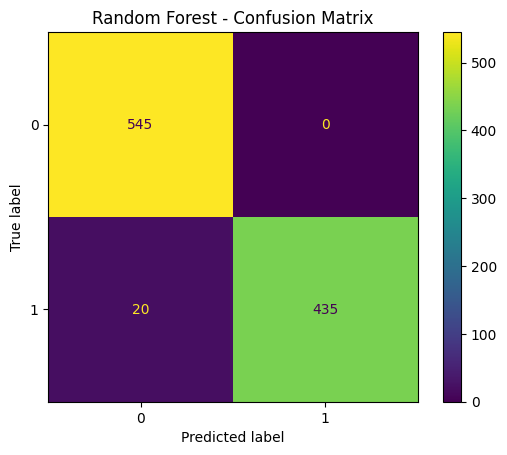

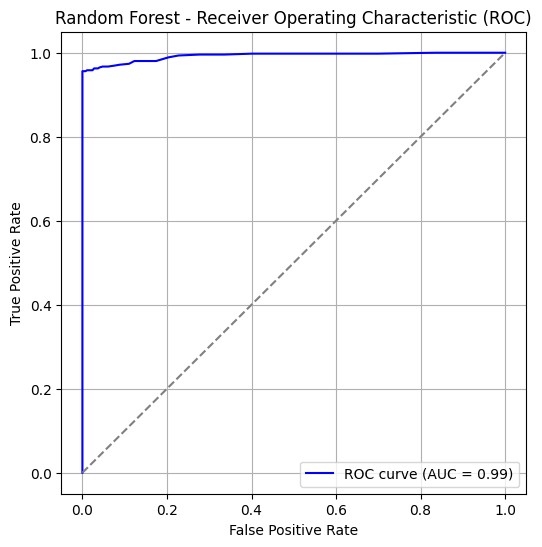


Random Forest Evaluation Metrics:
Accuracy : 0.9800
Precision: 1.0000
Recall   : 0.9560
F1 Score : 0.9775
AUC-ROC  : 0.9927


In [36]:
numerical_features = [
    "Age", "Subscription_Length", "Support_Tickets_Raised",
    "Satisfaction_Score", "Discount_Offered", "Last_Activity"
]

categorical_features = [
    "Gender", "Region", "Payment_Method"
]


x = stream_df[numerical_features + categorical_features]
y = stream_df["Churned"]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


x_train_scaled = preprocessor.fit_transform(x_train)
x_test_scaled = preprocessor.transform(x_test)

# Training Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled, y_train)


rf_pred = rf_model.predict(x_test_scaled)
probs = rf_model.predict_proba(x_test_scaled)[:, 1]

# ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC Curve Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)

print("\nRandom Forest Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC-ROC  : {roc_auc:.4f}")

## SVM

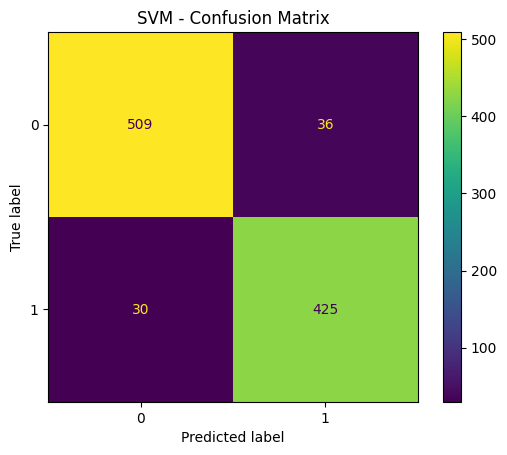

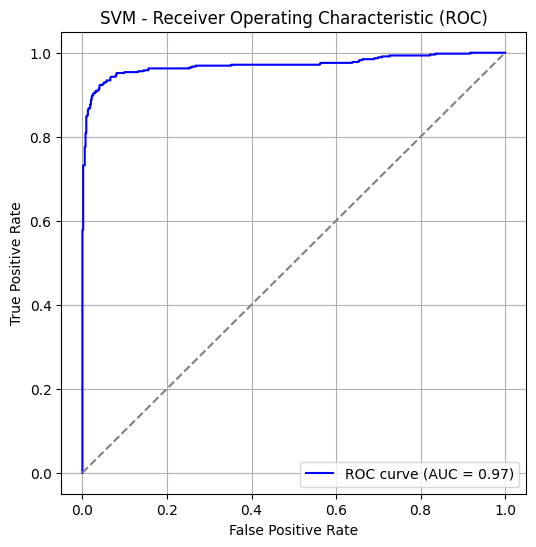


SVM Evaluation Metrics:
Accuracy : 0.9340
Precision: 0.9219
Recall   : 0.9341
F1 Score : 0.9279
AUC-ROC  : 0.9712


In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


svm_model = SVC(probability=True, random_state=42)


svm_model.fit(x_train_scaled, y_train)


svm_pred = svm_model.predict(x_test_scaled)
svm_probs = svm_model.predict_proba(x_test_scaled)[:, 1]

# ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, svm_probs)
roc_auc = auc(fpr, tpr)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.title("SVM - Confusion Matrix")
plt.show()

# ROC Curve Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM - Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Evaluation metrics
accuracy = accuracy_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred)
recall = recall_score(y_test, svm_pred)
f1 = f1_score(y_test, svm_pred)

print("\nSVM Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC-ROC  : {roc_auc:.4f}")


## Kmeans

#### I wrote a function called test_feature_vs_monthly to perform K-Means clustering on a specified feature and the target variable(MonthlySpend) and evaluate the clustering quality with the Davies–Bouldin Index and Silhouette Score, and visualizes the results through plots and loops to the next feature

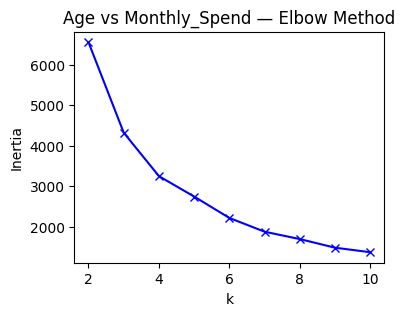

Optimal k based on silhouette score for Age: 7
Age                        Davies–Bouldin: 0.7940, Silhouette: 0.3619


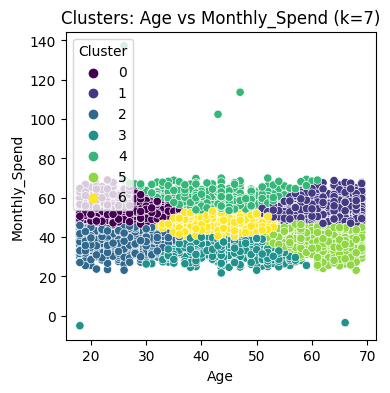

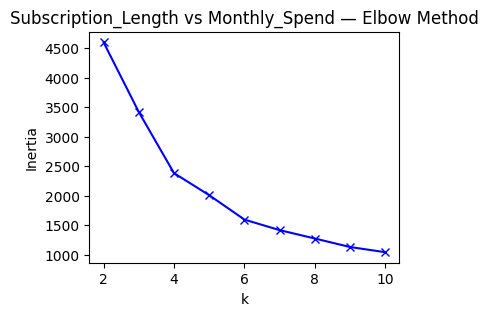

Optimal k based on silhouette score for Subscription_Length: 2
Subscription_Length        Davies–Bouldin: 0.8367, Silhouette: 0.4512


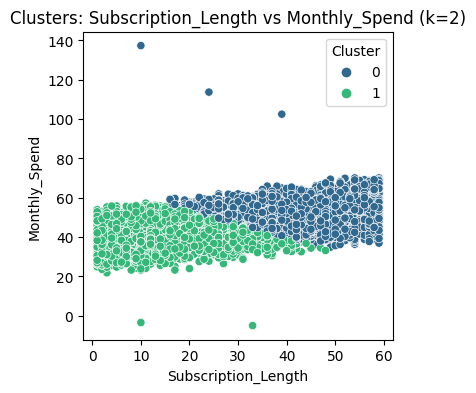

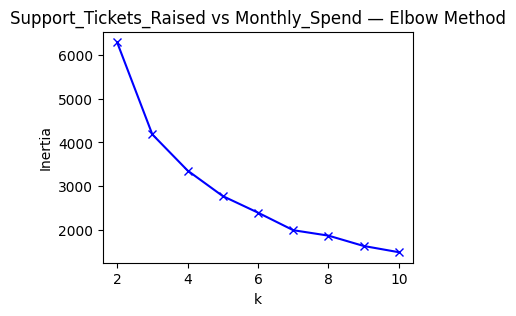

Optimal k based on silhouette score for Support_Tickets_Raised: 10
Support_Tickets_Raised     Davies–Bouldin: 0.8637, Silhouette: 0.3749


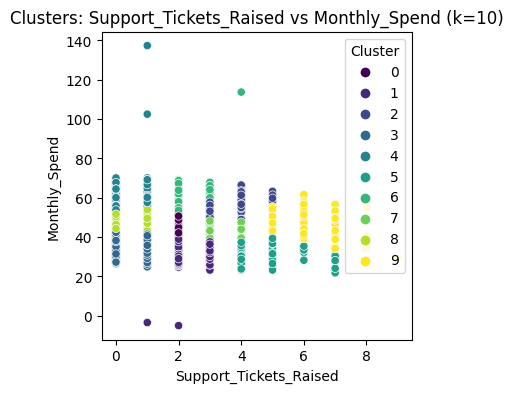

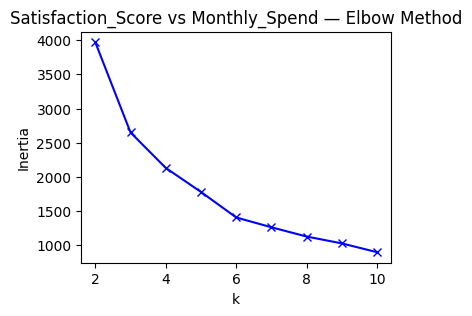

Optimal k based on silhouette score for Satisfaction_Score: 2
Satisfaction_Score         Davies–Bouldin: 0.7363, Silhouette: 0.4915


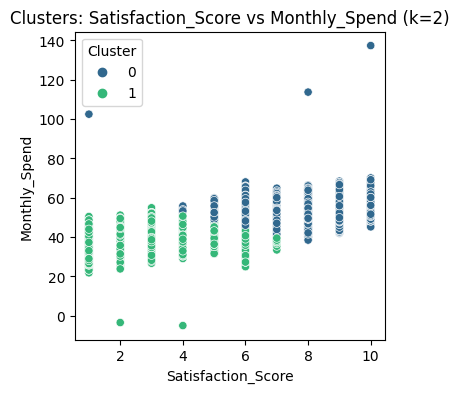

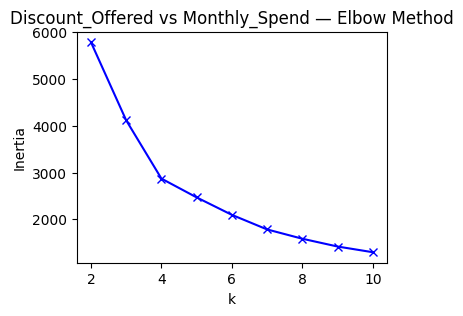

Optimal k based on silhouette score for Discount_Offered: 2
Discount_Offered           Davies–Bouldin: 1.0396, Silhouette: 0.3856


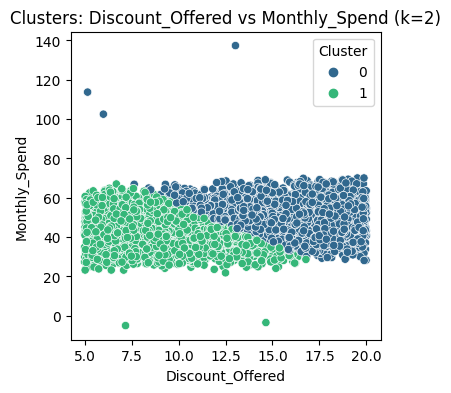

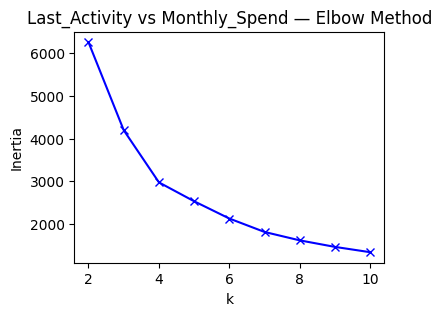

Optimal k based on silhouette score for Last_Activity: 4
Last_Activity              Davies–Bouldin: 0.8579, Silhouette: 0.3660


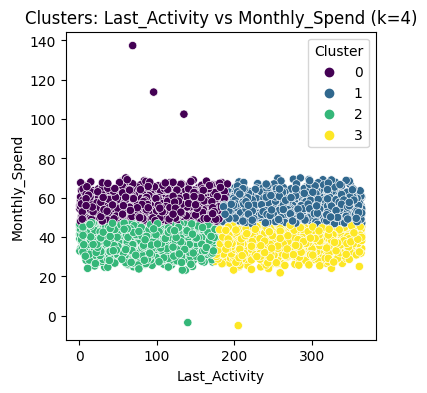

In [38]:
def test_feature_vs_monthly(df, feature, monthly_col="Monthly_Spend", 
                            k_max=10, random_state=42):
    # Extract and scale the two columns
    pair = df[[feature, monthly_col]].dropna()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(pair.values)

    # Elbow plot and calculate metrics for different k
    inertia = []
    sil_scores = []
    db_scores = []
    ks = range(2, k_max + 1)  # Starting from k=2, since k=1 is not meaningful for clustering
    for k in ks:
        km = KMeans(n_clusters=k, random_state=random_state)
        km.fit(X_scaled)
        inertia.append(km.inertia_)
        sil_scores.append(silhouette_score(X_scaled, km.labels_))
        db_scores.append(davies_bouldin_score(X_scaled, km.labels_))

    # Elbow plot
    plt.figure(figsize=(4, 3))
    plt.plot(ks, inertia, 'bx-')
    plt.title(f"{feature} vs {monthly_col} — Elbow Method")
    plt.xlabel("k"); plt.ylabel("Inertia")
    plt.show()

    # Selecting optimal k using the maximum silhouette score
    optimal_k = ks[sil_scores.index(max(sil_scores))]
    print(f"Optimal k based on silhouette score for {feature}: {optimal_k}")

    # Fitting k-Means with optimal k
    km_final = KMeans(n_clusters=optimal_k, random_state=random_state)
    labels = km_final.fit_predict(X_scaled)

    # Computing metrics for the optimal k
    db = davies_bouldin_score(X_scaled, labels)
    sil = silhouette_score(X_scaled, labels)
    print(f"{feature:25s}  Davies–Bouldin: {db:.4f}, Silhouette: {sil:.4f}")

    # Scatter plot 
    plt.figure(figsize=(4, 4))
    sns.scatterplot(
        x=pair[feature], y=pair[monthly_col],
        hue=labels, palette='viridis', legend='full')  
    plt.title(f"Clusters: {feature} vs {monthly_col} (k={optimal_k})")
    plt.xlabel(feature); plt.ylabel(monthly_col)
    plt.legend(title="Cluster")
    plt.show()
    

# List of features to test 
features_to_test = [
    "Age", "Subscription_Length", "Support_Tickets_Raised",
    "Satisfaction_Score", "Discount_Offered", "Last_Activity"
]

# Running the test for each feature in stream_df
for feat in features_to_test:
    test_feature_vs_monthly(stream_df, feat)




## Hierarichal Clustering

#### I wrote a function callled cluster_hierarchical_vs_monthly to perform hierarchical(agglomerative) clustering on various features of a dataset to explore potential patterns or groupings in relation to the target variable(Monthly Spend) and to evaluate the clustering quality using metrics like the Davies–Bouldin Index and Silhouette Score, and visualizes the results through plots looping through the features

Silhouette scores for Age: [(2, 0.7610210134619976), (3, 0.6704548807961432), (4, 0.2178382135432082), (5, 0.21647421079723544), (6, 0.20812561336817698), (7, 0.23337769159400276), (8, 0.23329248198138922), (9, 0.23320840141297422), (10, 0.2548538312816269)]


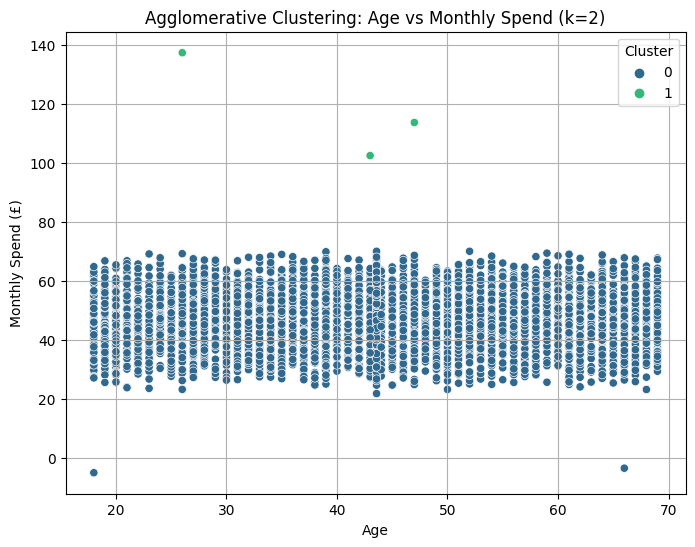

Feature: Age
Optimal number of clusters (k): 2
Davies–Bouldin Score: 0.3755
Silhouette Score     : 0.7610

Silhouette scores for Subscription_Length: [(2, 0.7654346643239393), (3, 0.30692227762124186), (4, 0.3052767086663193), (5, 0.21875699214015912), (6, 0.21864515284231767), (7, 0.32029041048638185), (8, 0.27794829466490556), (9, 0.2630119380710049), (10, 0.25214359188137453)]


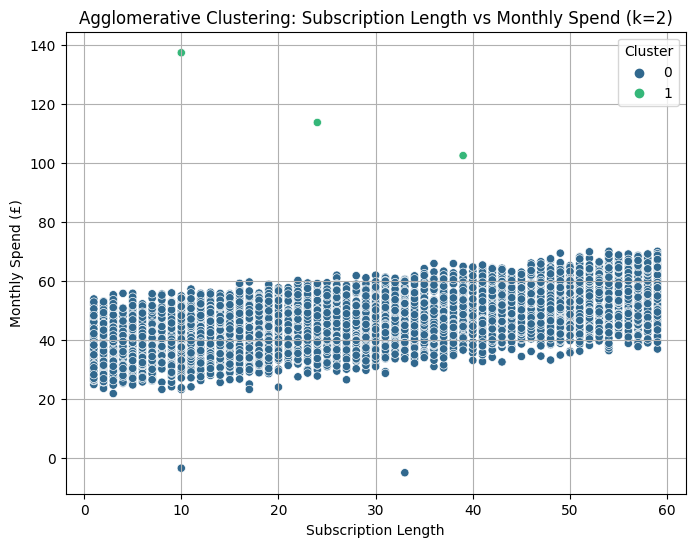

Feature: Subscription_Length
Optimal number of clusters (k): 2
Davies–Bouldin Score: 0.3697
Silhouette Score     : 0.7654

Silhouette scores for Support_Tickets_Raised: [(2, 0.7666370956861273), (3, 0.31972191197647826), (4, 0.28329617107652694), (5, 0.34871461871648446), (6, 0.349119791093525), (7, 0.3408553528425995), (8, 0.3308790251267528), (9, 0.33067780513272377), (10, 0.2853290245609908)]


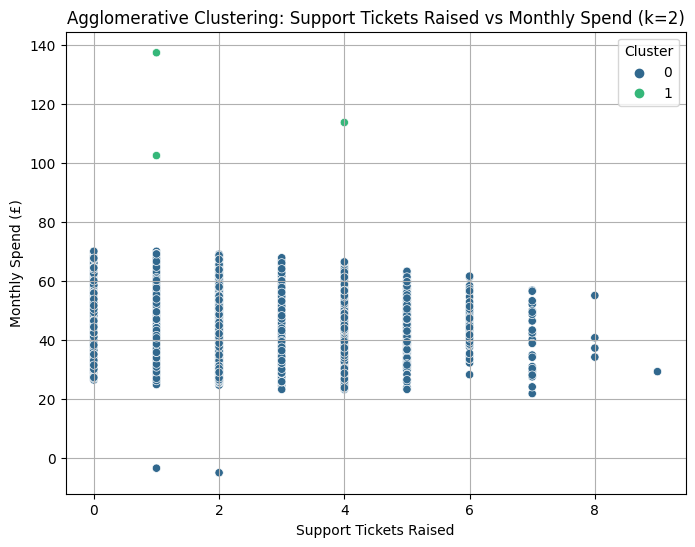

Feature: Support_Tickets_Raised
Optimal number of clusters (k): 2
Davies–Bouldin Score: 0.4069
Silhouette Score     : 0.7666

Silhouette scores for Satisfaction_Score: [(2, 0.7736138945500299), (3, 0.4795155249485721), (4, 0.4790083262630651), (5, 0.4788252326521696), (6, 0.37567858683818606), (7, 0.32755575652171137), (8, 0.32978275146361885), (9, 0.33784541373582433), (10, 0.33773375476252426)]


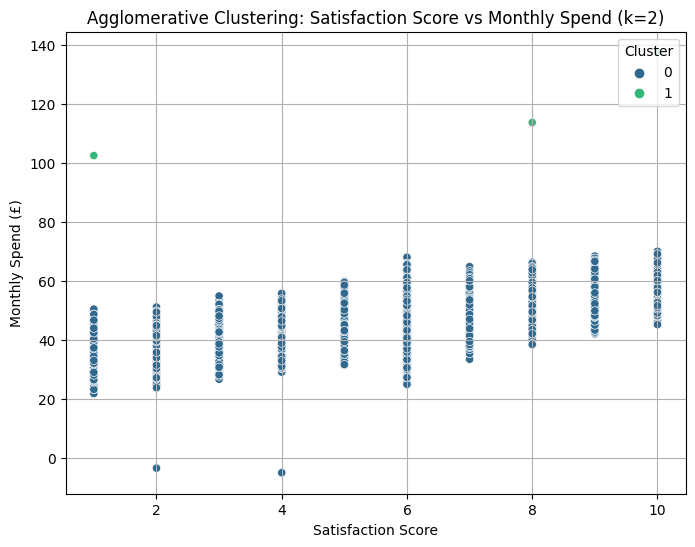

Feature: Satisfaction_Score
Optimal number of clusters (k): 2
Davies–Bouldin Score: 0.4215
Silhouette Score     : 0.7736

Silhouette scores for Discount_Offered: [(2, 0.7650398567823188), (3, 0.6606348540107614), (4, 0.27263636705038613), (5, 0.3219637005205704), (6, 0.34867282406905625), (7, 0.3485905093156438), (8, 0.3041583827256704), (9, 0.2576237239576351), (10, 0.2739680306254166)]


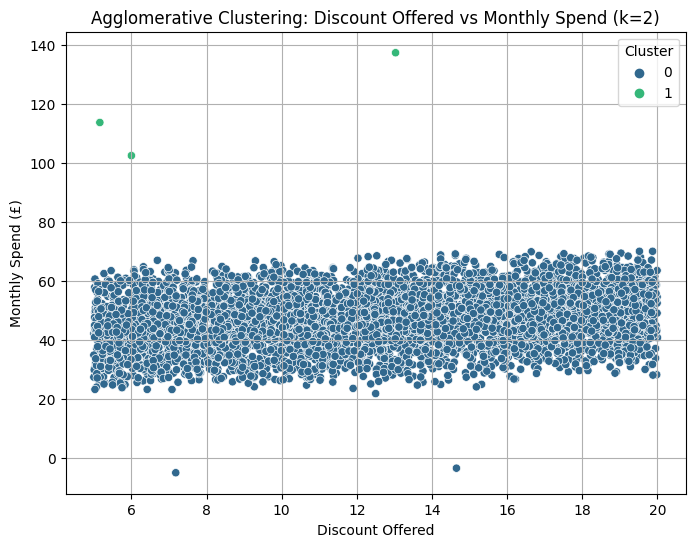

Feature: Discount_Offered
Optimal number of clusters (k): 2
Davies–Bouldin Score: 0.3843
Silhouette Score     : 0.7650

Silhouette scores for Last_Activity: [(2, 0.76099461563036), (3, 0.6544537754760369), (4, 0.29583018523003085), (5, 0.3075762953981996), (6, 0.324139361885986), (7, 0.3240117644876556), (8, 0.31791114768626777), (9, 0.289250771462353), (10, 0.2754861688533094)]


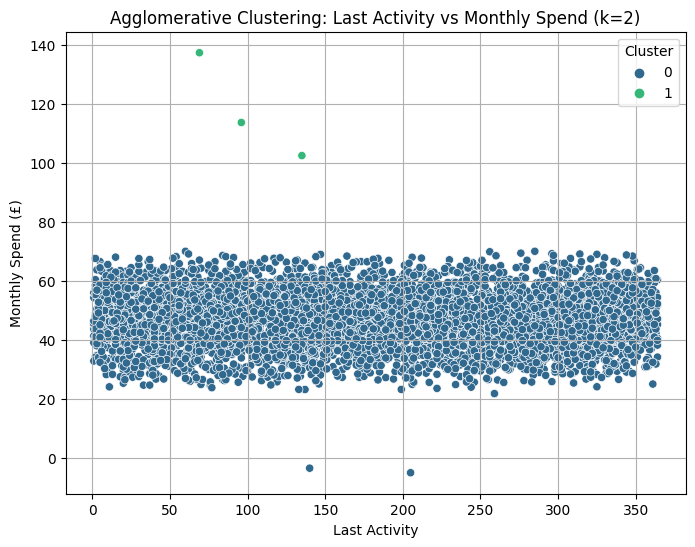

Feature: Last_Activity
Optimal number of clusters (k): 2
Davies–Bouldin Score: 0.3558
Silhouette Score     : 0.7610



In [39]:
# Function 
def cluster_hierarchical_vs_monthly_auto(stream_df, features, max_clusters=10):
    for feature in features:
        feature_names = [feature, "Monthly_Spend"]
        x = stream_df[feature_names]

    
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(x)

        best_k = 2  # Default value
        best_score = -1
        silhouette_scores = []  # To store silhouette scores for each k
        
        # Loop through possible cluster sizes and evaluate silhouette score
        for k in range(2, max_clusters + 1):  # Try 2 to max_clusters clusters
            agg_model = AgglomerativeClustering(n_clusters=k, linkage='complete')
            agg_labels_pred = agg_model.fit_predict(x_scaled)
            
            # Calculate silhouette score
            s_score = silhouette_score(x_scaled, agg_labels_pred)
            silhouette_scores.append((k, s_score))

            # Choosing the k with the best silhouette score
            if s_score > best_score:
                best_score = s_score
                best_k = k

        # Displaying silhouette scores for debugging
        print(f"Silhouette scores for {feature}: {silhouette_scores}")

        # Fit Agglomerative Clustering with the optimal k
        agg_model = AgglomerativeClustering(n_clusters=best_k, linkage='complete')
        agg_labels_pred = agg_model.fit_predict(x_scaled)
        
        
        db_score = davies_bouldin_score(x_scaled, agg_labels_pred)
        s_score = silhouette_score(x_scaled, agg_labels_pred)

        # Visualize clusters
        plt.figure(figsize=(8, 6))
        sns.scatterplot(
            x=stream_df[feature],
            y=stream_df["Monthly_Spend"],
            hue=agg_labels_pred,
            palette="viridis"
        )
        plt.xlabel(feature.replace("_", " "))
        plt.ylabel("Monthly Spend (£)")
        plt.title(f"Agglomerative Clustering: {feature.replace('_', ' ')} vs Monthly Spend (k={best_k})")
        plt.legend(title="Cluster", loc="upper right")
        plt.grid(True)
        plt.show()

        # Print metrics for the selected k
        print(f"Feature: {feature}")
        print(f"Optimal number of clusters (k): {best_k}")
        print("Davies–Bouldin Score: %.4f" % db_score)
        print("Silhouette Score     : %.4f\n" % s_score)

# List of features 
features_to_test = [
    "Age", 
    "Subscription_Length", 
    "Support_Tickets_Raised",
    "Satisfaction_Score", 
    "Discount_Offered", 
    "Last_Activity"
]


cluster_hierarchical_vs_monthly_auto(stream_df, features_to_test)